# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYC_Taxi/Datasets_and_Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp_df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        temp_df['tpep_pickup_datetime'] = pd.to_datetime(temp_df['tpep_pickup_datetime'])
            # Iterate through each hour of the selected date
        temp_df['date'] = temp_df['tpep_pickup_datetime'].dt.date
        temp_df['hour'] = temp_df['tpep_pickup_datetime'].dt.hour
        # Group data by date and hour
        grouped = temp_df.groupby(['date', 'hour'])
        # Iterate through each group and sample 5% of the data
        for (date, hour), group in grouped:
            sample = group.sample(frac=0.05, random_state=42)
            sampled_data = pd.concat([sampled_data, sample])
                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Successfully read and sampled data from {file_name}")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Successfully read and sampled data from 2023-1.parquet
Successfully read and sampled data from 2023-2.parquet
Successfully read and sampled data from 2023-3.parquet
Successfully read and sampled data from 2023-4.parquet
Successfully read and sampled data from 2023-5.parquet
Successfully read and sampled data from 2023-6.parquet
Successfully read and sampled data from 2023-7.parquet
Successfully read and sampled data from 2023-8.parquet
Successfully read and sampled data from 2023-9.parquet
Successfully read and sampled data from 2023-10.parquet
Successfully read and sampled data from 2023-11.parquet
Successfully read and sampled data from 2023-12.parquet
Error reading file sampled_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
80,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196251,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1.0,0.81,1.0,N,263,262,1,...,0.5,2.44,0.0,1.0,14.64,2.5,NaN,2023-12-31,23,0.0
3194866,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1.0,5.78,1.0,N,161,261,1,...,0.5,4.00,0.0,1.0,36.50,2.5,NaN,2023-12-31,23,0.0
3195561,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1.0,1.06,1.0,N,79,137,1,...,0.5,2.44,0.0,1.0,14.64,2.5,NaN,2023-12-31,23,0.0
3376497,1,2023-12-31 23:12:30,2023-12-31 23:21:12,NaN,0.00,NaN,None,166,244,0,...,0.5,0.00,0.0,1.0,16.14,NaN,NaN,2023-12-31,23,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# prompt: Ideally, you can try keeping the total entries to around 250,000 to 300,000.

# After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.
# Ideally, you can try keeping the total entries to around 250,000 to 300,000.

# Check the current number of rows
print(f"Number of rows in the combined DataFrame: {len(df)}")

# If the number of rows exceeds the desired limit, sample down to the target size
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)  # Sample 300,000 rows randomly
    print("DataFrame has been downsampled to 300,000 rows.")
    print(f"Number of rows in the downsampled DataFrame: {len(df)}")

# Save the DataFrame to a parquet file (more efficient for large datasets)
df.to_parquet('sampled_nyc_taxi_data.parquet', index=False)
print("DataFrame saved to 'sampled_nyc_taxi_data.parquet'")

# Alternatively, save as a CSV (less efficient for large datasets)
# df.to_csv('sampled_nyc_taxi_data.csv', index=False)
# print("DataFrame saved to 'sampled_nyc_taxi_data.csv'")


In [51]:
# Store the df in csv/parquet
print(f"Number of rows in the combined DataFrame: {len(df)}")

# If the number of rows exceeds the desired limit, sample down to the target size
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)  # Sample 300,000 rows randomly
    print("DataFrame has been downsampled to 300,000 rows.")
    print(f"Number of rows in the downsampled DataFrame: {len(df)}")

# Save the DataFrame to a parquet file (more efficient for large datasets)
df.to_csv('sampled_nyc_taxi_data.csv', index=False)
print("DataFrame saved to 'sampled_nyc_taxi_data.csv'")

Number of rows in the combined DataFrame: 300000
DataFrame saved to 'sampled_nyc_taxi_data.csv'


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [52]:
# Load the new data file

df1 = pd.read_csv('sampled_nyc_taxi_data.csv')

In [53]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,0.5,3.95,0.0,1.0,23.85,2.5,NaN,2023-10-02,18,0.0
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14,NaN
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,0.5,0.00,0.0,1.0,15.70,2.5,NaN,2023-07-11,20,0.0
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,0.5,3.14,0.0,1.0,18.84,2.5,NaN,2023-04-07,22,0.0
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.5,7.05,0.0,1.0,35.35,0.0,NaN,2023-12-08,15,0.0


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289831 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289831 non-null  float64
 6   store_and_fwd_flag     289831 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [55]:
# Fix the index and drop any columns that are not needed
df1 = df1.reset_index(drop=True)

# Drop unnecessary columns (example - 'Unnamed: 0' if present)
if 'Unnamed: 0' in df1.columns:
    df1 = df1.drop('Unnamed: 0', axis=1)



df1.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,0.5,3.95,0.0,1.0,23.85,2.5,NaN,2023-10-02,18,0.0
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14,NaN
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,0.5,0.00,0.0,1.0,15.70,2.5,NaN,2023-07-11,20,0.0
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,0.5,3.14,0.0,1.0,18.84,2.5,NaN,2023-04-07,22,0.0
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.5,7.05,0.0,1.0,35.35,0.0,NaN,2023-12-08,15,0.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [56]:
# Combine the two airport fee columns
if 'Airport_fee' in df1.columns and 'airport_fee' in df1.columns:
    # Combine values, prioritizing 'Airport_fee' if both have values
    df1['airport_fee'] = df1.apply(lambda row: row['Airport_fee'] if pd.notna(row['Airport_fee']) else row['airport_fee'], axis=1)
    # Drop the original columns
    df1 = df1.drop(['Airport_fee'], axis=1)
elif 'Airport_fee' in df1.columns:
    df1.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)
elif 'airport_fee' not in df1.columns:
    print("Neither 'Airport_fee' nor 'airport_fee' columns found in the dataframe")

df1.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0,2023-10-02,18
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.0,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,1.0,0.5,0.00,0.0,1.0,15.70,2.5,0.0,2023-07-11,20
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-04-07,22
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.0,0.5,7.05,0.0,1.0,35.35,0.0,0.0,2023-12-08,15


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [57]:
# check where values of fare amount are negative
df1[df1['fare_amount'] < 0.0]



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [58]:
# Analyse RatecodeID for the negative fare amounts
df1['RatecodeID']


,RatecodeID
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
299995,1.0
299996,1.0
299997,1.0
299998,1.0


In [59]:
# Find which columns have negative values

negative_value_columns = []
for col in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[col]):  # Check if the column is numeric
        if (df1[col] < 0).any():
            negative_value_columns.append(col)

print("Columns with negative values:", negative_value_columns)


Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [60]:
# fix these negative values
negative_fare_indices = df1[df1['fare_amount'] < 0].index
print(f"Number of negative fare amounts: {len(negative_fare_indices)}")

# Analyze RatecodeID for negative fare amounts
negative_fare_ratecodes = df1.loc[negative_fare_indices, 'RatecodeID']
print(f"RatecodeID values for negative fare amounts:\n{negative_fare_ratecodes.value_counts()}")

# Example: Replace negative fare amounts with 0 (or handle them differently based on your analysis)
df1.loc[df1['fare_amount'] < 0, 'fare_amount'] = 0

# Repeat for other monetary columns (e.g., tip_amount, tolls_amount, total_amount, etc.)
monetary_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in monetary_columns:
    if col in df1.columns:
      df1.loc[df1[col] < 0, col] = 0
    else:
      print(f"Column '{col}' not found in the DataFrame.")

df1.describe()



Number of negative fare amounts: 0
RatecodeID values for negative fare amounts:
Series([], Name: count, dtype: int64)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,300000.000000,289831.000000,300000.000000,289831.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,289831.000000,289831.000000,300000.000000
mean,1.734790,1.370964,3.682413,1.623501,165.367917,164.002107,1.163277,19.864766,1.583098,0.495322,3.551342,0.598038,0.999040,28.933024,2.308871,0.142850,14.258340
std,0.446775,0.895564,72.802339,7.320174,64.057896,69.822809,0.506226,18.572808,1.827604,0.048244,4.069065,2.209835,0.028466,23.079607,0.664299,0.464938,5.802213
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,11.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,15.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.900000,2.500000,0.000000,19.000000
max,6.000000,8.000000,30430.040000,99.000000,265.000000,265.000000,4.000000,1375.000000,11.750000,0.800000,200.000000,143.000000,1.000000,1435.190000,2.500000,1.750000,23.000000


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [62]:
# Find the proportion of missing values in each column

missing_values_proportion = df1.isnull().sum() / len(df1) *100

missing_values_proportion

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.389667
trip_distance,0.000000
RatecodeID,3.389667
store_and_fwd_flag,3.389667
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [63]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df1[df1['passenger_count'].isnull()])
df1['passenger_count'].fillna(df1['passenger_count'].median(), inplace=True)


zero_passenger_count = df1[df1['passenger_count'] == 0]
print(f"Number of rows with zero passenger count: {len(zero_passenger_count)}")

median_passenger_count = df1['passenger_count'].median()
df1['passenger_count'] = df1['passenger_count'].replace(0, median_passenger_count)

zero_passenger_count_after = df1[df1['passenger_count'] == 0]
print(f"Number of rows with zero passenger count after handling: {len(zero_passenger_count_after)}")


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
35             1  2023-02-15 19:32:47   2023-02-15 19:45:46              NaN   
71             1  2023-10-31 17:28:35   2023-10-31 17:38:26              NaN   
74             6  2023-07-11 14:07:55   2023-07-11 21:07:31              NaN   
91             1  2023-03-23 09:49:53   2023-03-23 10:02:21              NaN   
108            6  2023-03-28 14:03:18   2023-03-28 15:03:25              NaN   
...          ...                  ...                   ...              ...   
299717         1  2023-11-21 13:08:54   2023-11-21 13:32:17              NaN   
299854         1  2023-11-28 21:11:23   2023-11-28 21:22:27              NaN   
299867         1  2023-10-20 23:33:48   2023-10-20 23:55:53              NaN   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              NaN   
299920         1  2023-05-07 15:19:38   2023-05-07 15:45:45              NaN   

        trip_distance  RatecodeID store

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [64]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID'].fillna(df1['RatecodeID'].median(), inplace=True)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0,2023-10-02,18
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.0,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,1.0,0.5,0.00,0.0,1.0,15.70,2.5,0.0,2023-07-11,20
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-04-07,22
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.0,0.5,7.05,0.0,1.0,35.35,0.0,0.0,2023-12-08,15


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [65]:
# handle null values in congestion_surcharge

df1['congestion_surcharge'].fillna(df1['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [66]:
# Handle any remaining missing values

#Check for other columns with missing values and handle them appropriately
for col in df1.columns:
    if df1[col].isnull().any():
        print(f"Column '{col}' has missing values.")
        # Choose an appropriate imputation method based on the column's data type and characteristics.
        if pd.api.types.is_numeric_dtype(df1[col]):
            df1[col].fillna(df1[col].median(), inplace=True)  # Impute with median for numeric columns
        else:
            df1[col].fillna(df1[col].mode()[0], inplace=True)  # Impute with mode for categorical columns


Column 'store_and_fwd_flag' has missing values.
Column 'airport_fee' has missing values.


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [67]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df1.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.734790,1.373843,3.682413,1.602367,165.367917,164.002107,1.163277,19.864766,1.583098,0.495322,3.551342,0.598038,0.999040,28.933024,2.315350,0.138008,14.258340
std,0.446775,0.867518,72.802339,7.195924,64.057896,69.822809,0.506226,18.572808,1.827604,0.048244,4.069065,2.209835,0.028466,23.079607,0.653858,0.457721,5.802213
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,11.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,15.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.900000,2.500000,0.000000,19.000000
max,6.000000,8.000000,30430.040000,99.000000,265.000000,265.000000,4.000000,1375.000000,11.750000,0.800000,200.000000,143.000000,1.000000,1435.190000,2.500000,1.750000,23.000000


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [68]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6]
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0,2023-10-02,18
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.0,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,1.0,0.5,0.00,0.0,1.0,15.70,2.5,0.0,2023-07-11,20
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-04-07,22
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.0,0.5,7.05,0.0,1.0,35.35,0.0,0.0,2023-12-08,15


In [69]:
# Continue with outlier handling

# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df1 = df1[~((df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df1 = df1[~((df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) & (df1['PULocationID'] != df1['DOLocationID']))]

# Remove entries where trip_distance is more than 250 miles
df1 = df1[df1['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df1 = df1[df1['payment_type'] != 0]

#Remove entries where passenger_count is greater than or equal to 7
df1 = df1[df1['passenger_count'] < 7]



In [70]:
# Do any columns need standardising?

for col in ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee']:
    if col in df1.columns:
        print(f"Column '{col}':")
        print(df1[col].describe())
        print("-" * 20)

Column 'trip_distance':
count    289811.000000
mean          3.447651
std           4.582898
min           0.000000
25%           1.050000
50%           1.780000
75%           3.390000
max         204.860000
Name: trip_distance, dtype: float64
--------------------
Column 'fare_amount':
count    289811.000000
mean         19.751065
std          18.476364
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max        1375.000000
Name: fare_amount, dtype: float64
--------------------
Column 'tip_amount':
count    289811.000000
mean          3.576281
std           4.082332
min           0.000000
25%           1.000000
50%           2.860000
75%           4.450000
max         200.000000
Name: tip_amount, dtype: float64
--------------------
Column 'tolls_amount':
count    289811.000000
mean          0.595967
std           2.202112
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         143.000000
Name: to

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

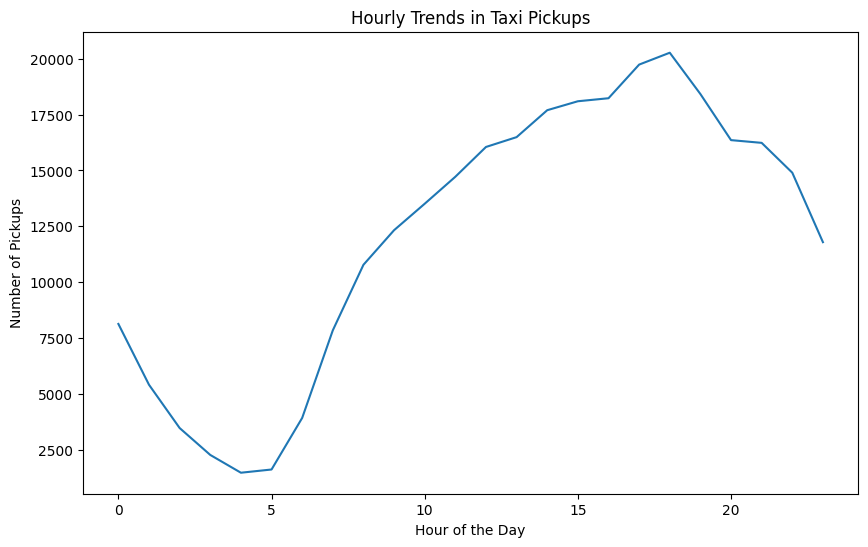

In [72]:
# Find and show the hourly trends in taxi pickups

# Convert 'tpep_pickup_datetime' to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df1['month'] = df1['tpep_pickup_datetime'].dt.month

# Hourly trends
hourly_trends = df1.groupby('pickup_hour')['pickup_hour'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values)
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()





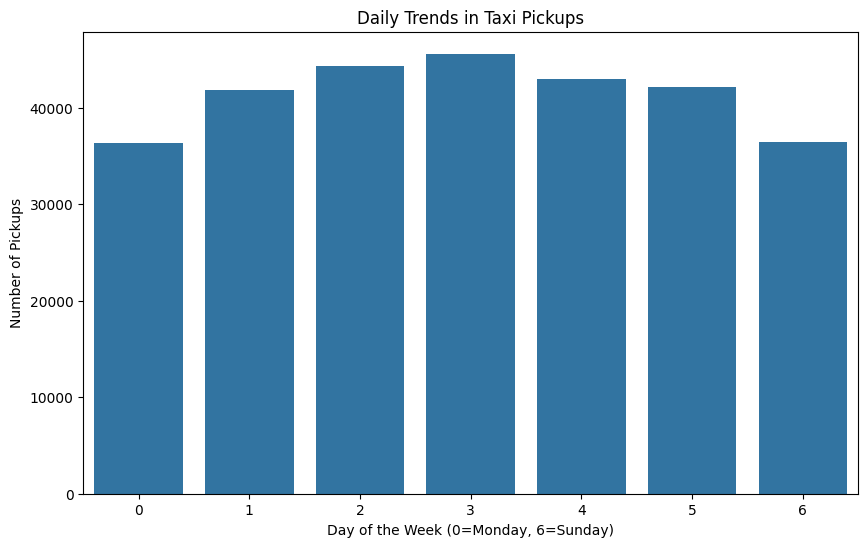

In [73]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_trends = df1.groupby('day_of_week')['day_of_week'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_trends.index, y=daily_trends.values)
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()


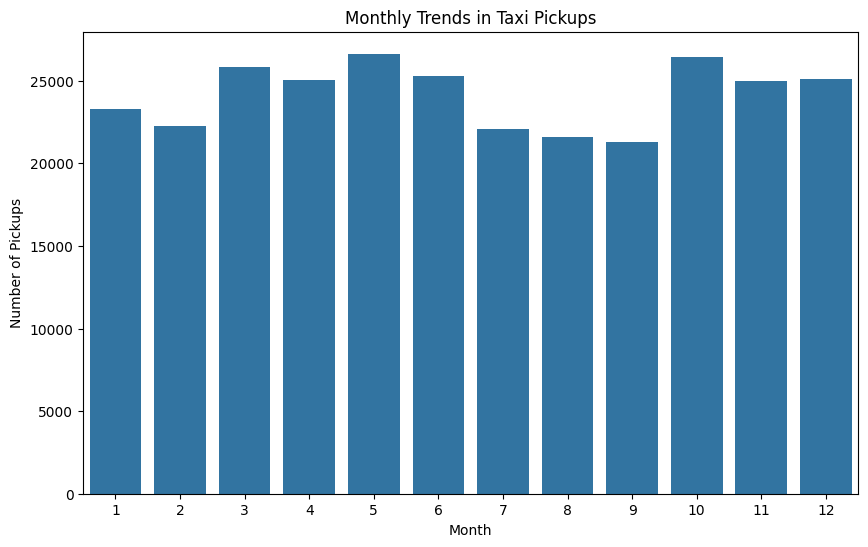

In [74]:
# Show the monthly trends in pickups
monthly_trends = df1.groupby('month')['month'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [75]:
# Analyse the above parameters


financial_columns = ['fare_amount', 'tip_amount', 'total_amount']
distance_column = 'trip_distance'

for col in financial_columns:
    zero_count = (df1[col] == 0).sum()
    negative_count = (df1[col] < 0).sum()
    print(f"Column '{col}':")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")

zero_distance_count = (df1[distance_column] == 0).sum()
negative_distance_count = (df1[distance_column] < 0).sum()
print(f"\nColumn '{distance_column}':")
print(f"  Zero values: {zero_distance_count}")
print(f"  Negative values: {negative_distance_count}")

Column 'fare_amount':
  Zero values: 85
  Negative values: 0
Column 'tip_amount':
  Zero values: 64704
  Negative values: 0
Column 'total_amount':
  Zero values: 42
  Negative values: 0

Column 'trip_distance':
  Zero values: 3585
  Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [76]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df1.copy()

# Specify columns to filter
columns_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Filter out rows where any of the specified columns have zero values
df_filtered = df_filtered[df_filtered[columns_to_filter].gt(0).all(axis=1)]

# Display the filtered DataFrame
print(df_filtered.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
3         2  2023-04-07 22:25:23   2023-04-07 22:34:20              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   
6         2  2023-01-27 08:00:44   2023-01-27 08:18:51              2.0   
7         1  2023-04-13 10:20:25   2023-04-13 10:35:54              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.20         1.0                  N           162           236   
3           1.64         1.0                  N           229           107   
4           5.70         1.0                  Y           166           243   
6           2.68         1.0                  N           140            74   
7           1.30         1.0                  N           163           236   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

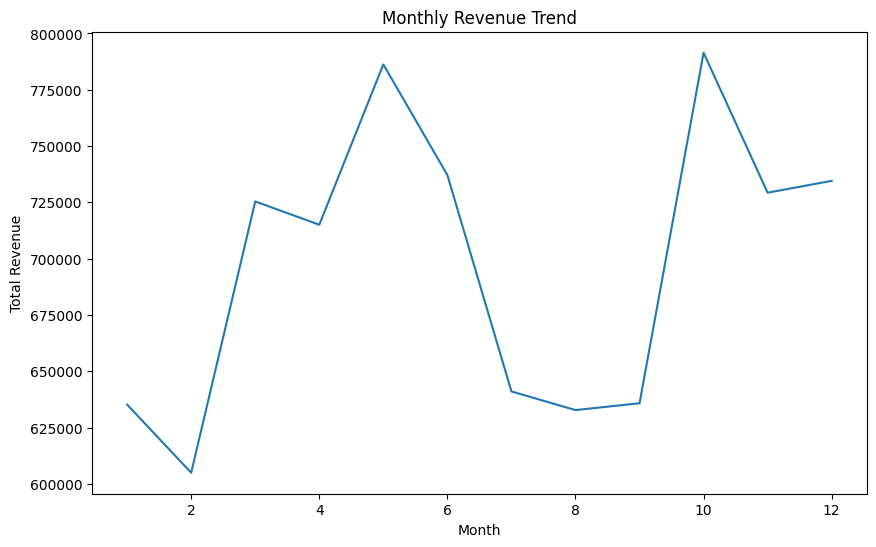

In [77]:
# Group data by month and analyse monthly revenue

monthly_revenue = df1.groupby('month')['total_amount'].sum()

# Plotting monthly revenue
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [78]:
monthly_avg_trip_distance = df1.groupby('month')['trip_distance'].mean()
monthly_avg_fare = df1.groupby('month')['fare_amount'].mean()
print(f'Monthly average trip distance: \n{monthly_avg_trip_distance}')
print(f'Monthly average fare: \n{monthly_avg_fare}')

Monthly average trip distance: 
month
1     3.371500
2     3.262926
3     3.376527
4     3.470212
5     3.551699
6     3.513533
7     3.581445
8     3.628351
9     3.439389
10    3.496925
11    3.361140
12    3.324271
Name: trip_distance, dtype: float64
Monthly average fare: 
month
1     18.541150
2     18.371055
3     19.085808
4     19.521437
5     20.220325
6     19.984197
7     19.999456
8     20.202379
9     20.543822
10    20.532248
11    19.904410
12    20.023007
Name: fare_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    23.486723
2    26.746758
3    22.818225
4    26.948295
Name: total_amount, dtype: float64


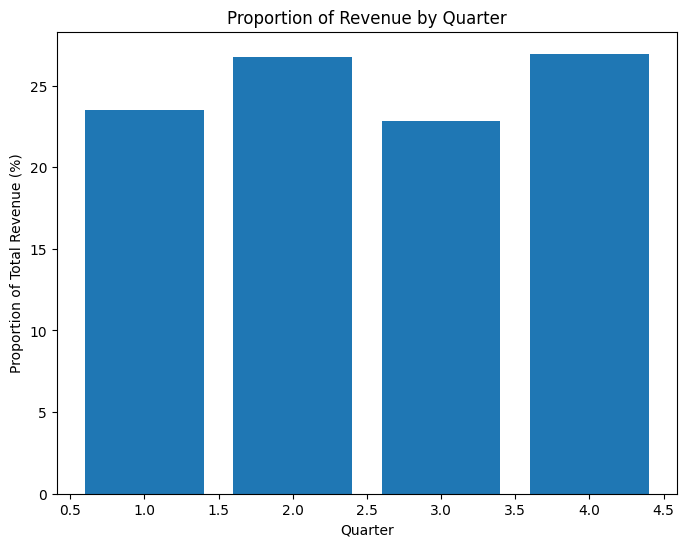

In [80]:
# Calculate proportion of each quarter

df1['quarter'] = df1['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df1.groupby('quarter')['total_amount'].sum()
total_revenue = df1['total_amount'].sum()
quarterly_proportions = quarterly_revenue / total_revenue * 100

print(quarterly_proportions)

# You can further visualize this using a bar plot or pie chart:
plt.figure(figsize=(8, 6))
plt.bar(quarterly_proportions.index, quarterly_proportions.values)
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue (%)")
plt.title("Proportion of Revenue by Quarter")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

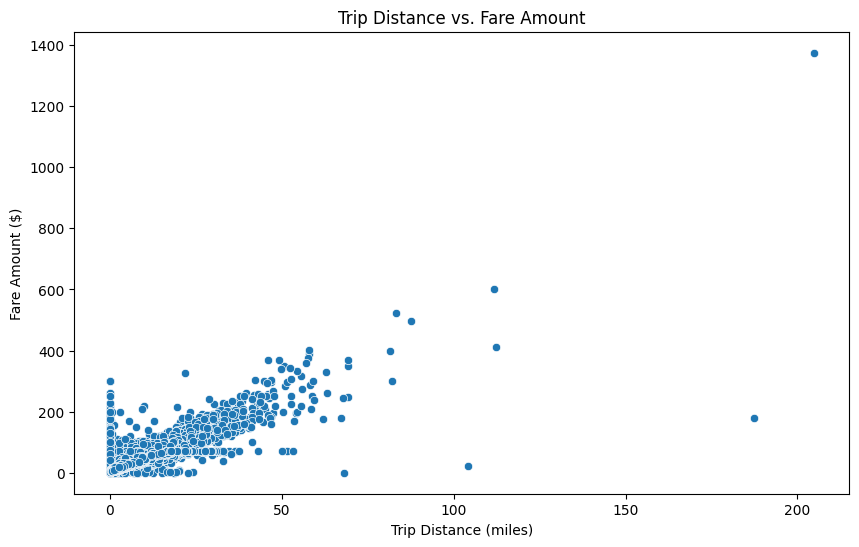

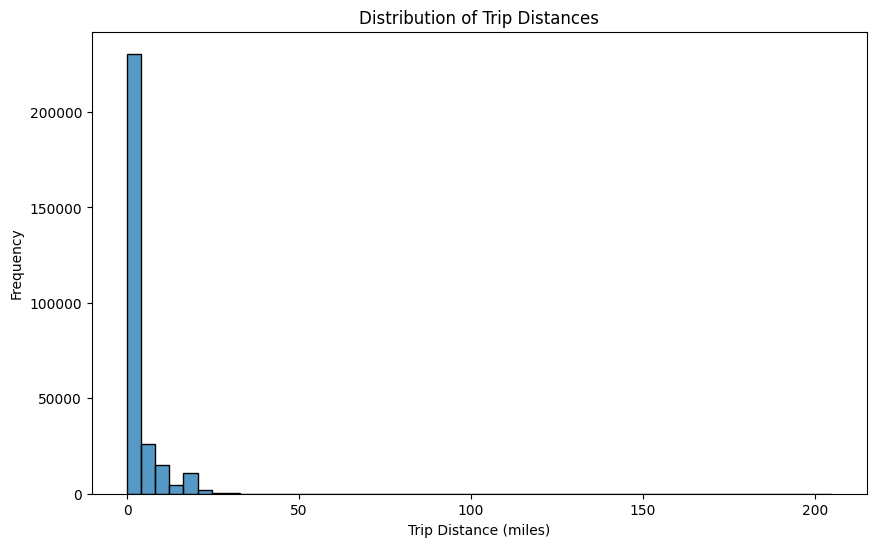

In [81]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df1)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Show the distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(df1['trip_distance'], bins=50)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

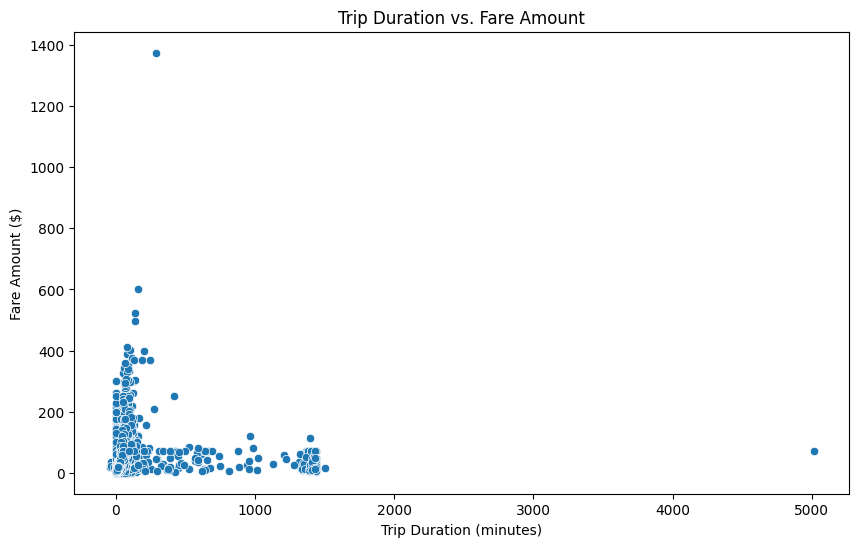

Correlation between fare_amount and trip_duration: 0.2663918005939924


In [82]:
# Show relationship between fare and trip duration

# Calculate trip duration
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

# 1. fare_amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df1)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation1 = df1['fare_amount'].corr(df1['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation1}")



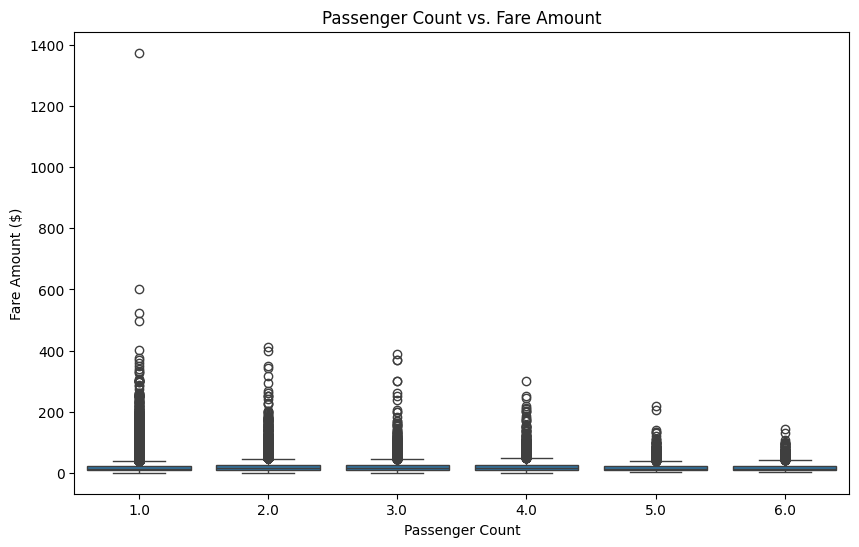

Correlation between fare_amount and passenger_count: 0.04391320867183879


In [83]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df1)
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation2 = df1['fare_amount'].corr(df1['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation2}")


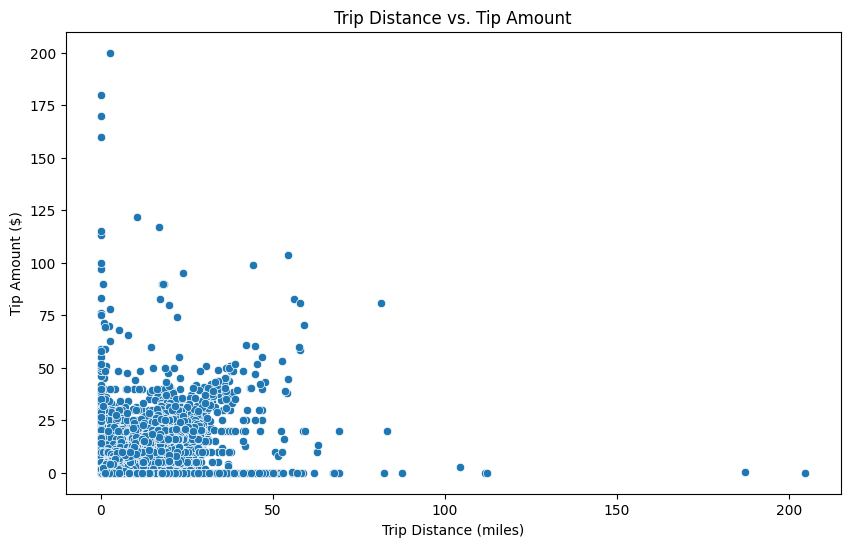

Correlation between tip_amount and trip_distance: 0.5685080501736736


In [84]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df1)
plt.title('Trip Distance vs. Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation3 = df1['tip_amount'].corr(df1['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation3}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    236307
2     50011
4      2138
3      1355
Name: count, dtype: int64


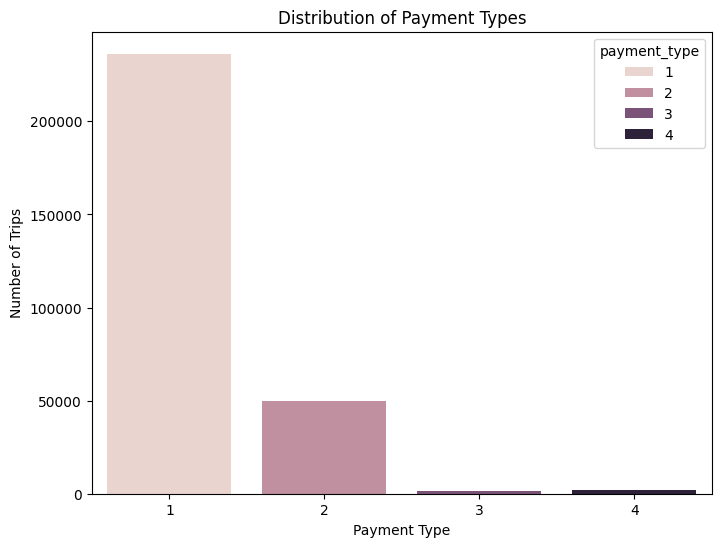

In [85]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df1['payment_type'].value_counts()
print(payment_type_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df1,hue='payment_type')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [41]:
!pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [86]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp')


zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

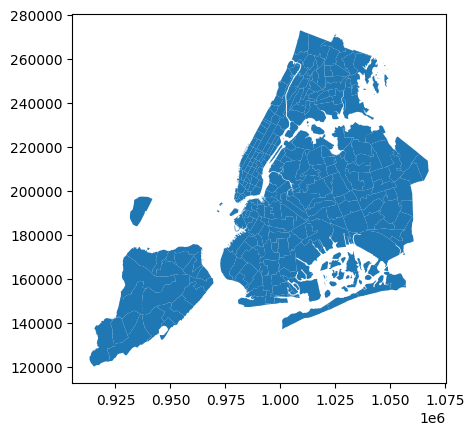

In [87]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [88]:
# Merge zones and trip records using locationID and PULocationID
df1 = pd.merge(df1, zones, left_on='PULocationID', right_on='LocationID', how='left')
df1.rename(columns={
    'zone': 'PUzone',
    'borough': 'PUborough'
}, inplace=True)
df1 = df1.drop('LocationID', axis=1)
df1 = pd.merge(df1, zones, left_on='DOLocationID', right_on='LocationID', how='left')
df1.rename(columns={
    'zone': 'DOzone',
    'borough': 'DOborough'
}, inplace=True)

df1 = df1.drop('LocationID', axis=1)
df1.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Shape_Area_x,PUzone,PUborough,geometry_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,DOzone,DOborough,geometry_y
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,0.000048,Midtown East,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",236.0,0.044252,0.000103,Upper East Side North,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220..."
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.000037,Penn Station/Madison Sq West,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",170.0,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21..."
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,0.000380,Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",239.0,0.063626,0.000205,Upper West Side South,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
3,2,2023-04-07 22:25:23,2023-04-07 22:34:20,1.0,1.64,1.0,N,229,107,1,...,0.000095,Sutton Place/Turtle Bay North,Manhattan,"POLYGON ((994880.664 214401.395, 994724.359 21...",107.0,0.038041,0.000075,Gramercy,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.000255,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",243.0,0.094331,0.000438,Washington Heights North,Manhattan,"POLYGON ((1003177.34 256097.318, 1003219.279 2..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [89]:
# Group data by location and calculate the number of trips
location_trip_counts = df1.groupby('PULocationID')['PULocationID'].count()


location_trip_counts


,PULocationID
PULocationID,
1,31
3,9
4,335
5,2
6,6
...,...
261,1580
262,3828
263,5575


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [90]:
# Merge trip counts back to the zones GeoDataFrame


zones = zones.merge(location_trip_counts.rename('trip_count'), left_on='LocationID', right_index=True)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",31
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",9
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",335
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",2
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",6


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

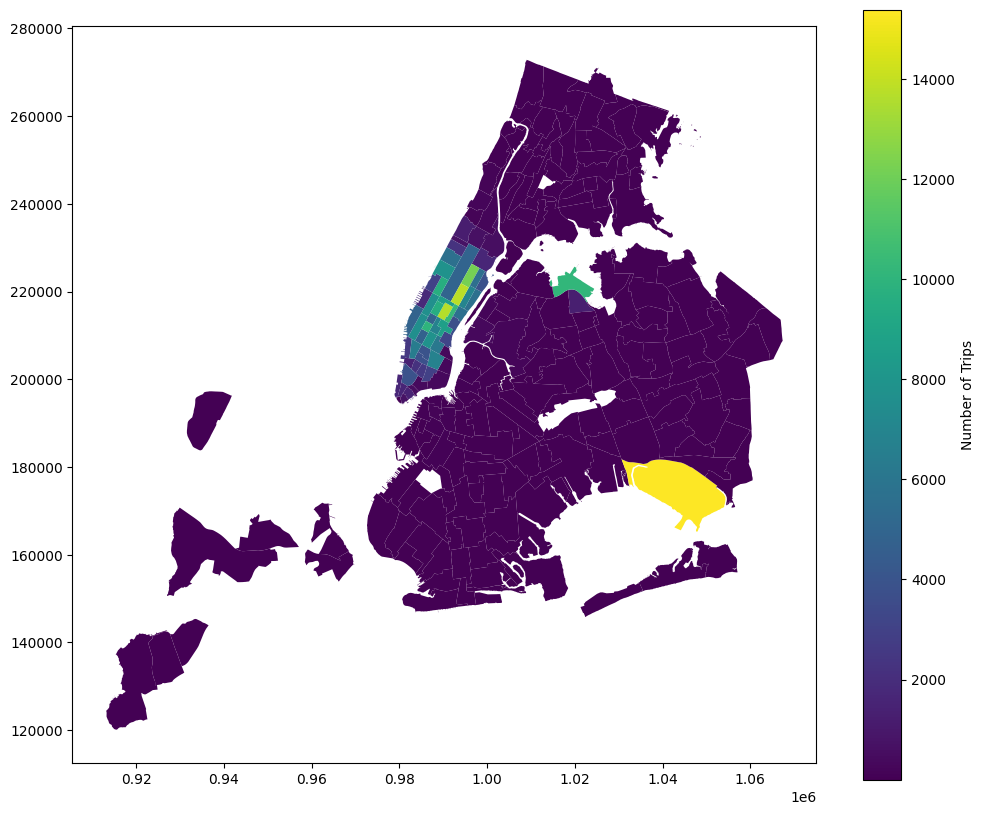

In [91]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.show()


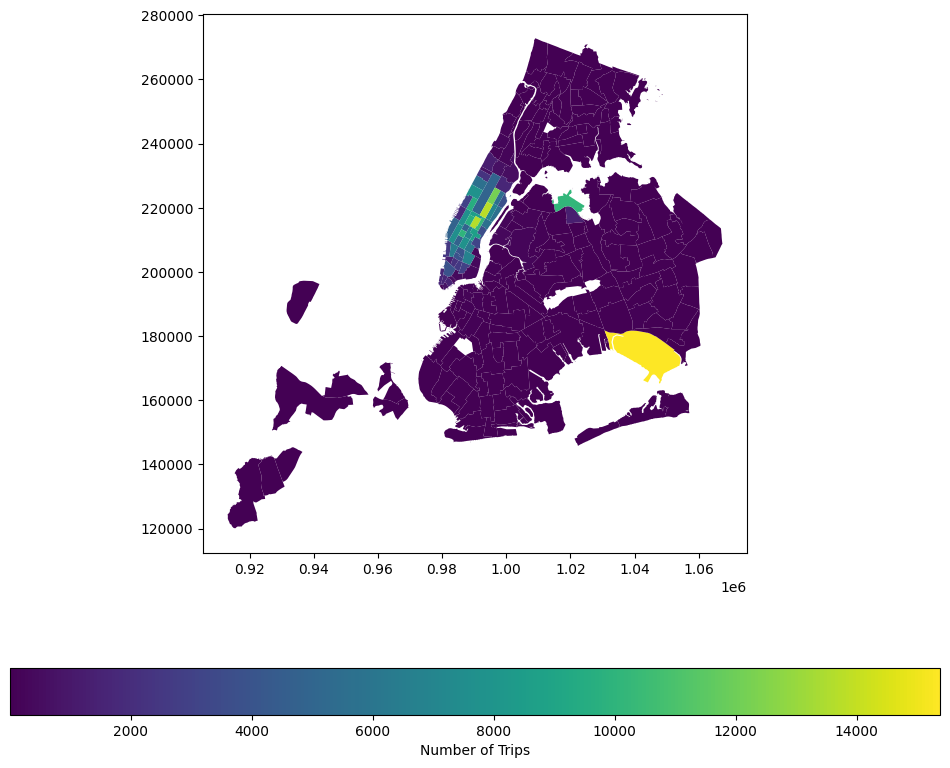

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",15378
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",13780
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",13657
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",12192
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",10287
...,...,...,...,...,...,...,...,...
183,184,0.260816,0.001989,Pelham Bay Park,184,Bronx,"MULTIPOLYGON (((1037536.693 262105.37, 1037634...",1
220,221,0.166218,0.000890,Stapleton,221,Staten Island,"POLYGON ((963349.728 171627.581, 963397.759 17...",1
203,204,0.101912,0.000641,Rossville/Woodrow,204,Staten Island,"POLYGON ((927766.539 141772.465, 927864.475 14...",1
239,240,0.146070,0.000722,Van Cortlandt Park,240,Bronx,"POLYGON ((1018410.344 266056.29, 1018222.428 2...",1


In [92]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='trip_count',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()

# Display the zones DataFrame sorted by the number of trips
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [97]:
# Find routes which have the slowest speeds at different times of the day


# Calculate average trip duration for each route and hour
df1['route'] = df1['PULocationID'].astype(str) + '_' + df1['DOLocationID'].astype(str)
route_hourly_avg_duration = df1.groupby(['route', 'pickup_hour'])['trip_duration'].mean().reset_index()

# Merge back into the original DataFrame
df1 = pd.merge(df1, route_hourly_avg_duration, on=['route', 'pickup_hour'], suffixes=('', '_avg'))

# Calculate speed for each trip
df1['speed'] = df1['trip_distance'] / df1['trip_duration_avg']

# Find the slowest routes at different times
slowest_routes = df1.loc[df1.groupby('pickup_hour')['speed'].idxmin()]

# Display the results
print(slowest_routes[['pickup_hour', 'route', 'speed']])

# Further analysis and visualization
# You can create visualizations (e.g., line plots, heatmaps) to better understand the slowest routes over time and across different locations.



        pickup_hour    route     speed
965               0    42_42  0.000000
179053            1   113_24 -2.172152
1279              2  170_170  0.000000
14498             3  148_148  0.000000
899               4    50_48  0.000000
10492             5    72_72  0.000000
20522             6    42_42  0.000000
82                7  151_163  0.000000
5198              8  193_193  0.000000
5113              9  234_234  0.000000
2150             10  193_231  0.000000
287155           11   263_41 -4.490323
936              12    74_74  0.000000
209              13  246_140  0.000000
1136             14  145_145  0.000000
688              15  132_132  0.000000
2370             16   137_77  0.000000
643              17  163_163  0.000000
32               18  100_148  0.000000
1156             19  265_265  0.000000
6334             20  229_229  0.000000
295              21  230_186  0.000000
1581             22   164_50  0.000000
627              23    10_10  0.000000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

The busiest hour is 18 with 20268 trips.


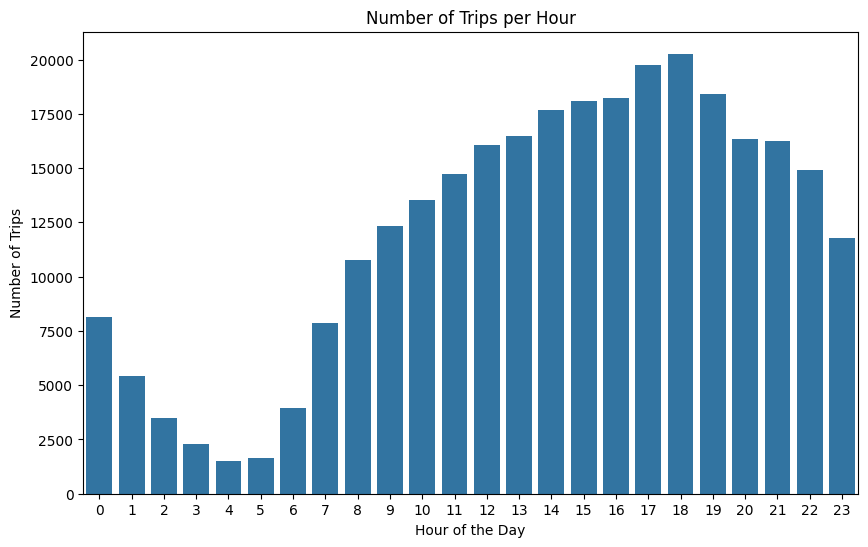

In [98]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df1.groupby('pickup_hour')['pickup_hour'].count()
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_trips} trips.")

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [99]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# Assuming 'hourly_trips' is already calculated as in the previous code
actual_hourly_trips = hourly_trips / sample_fraction

# Find the five busiest hours
top_5_busiest_hours = actual_hourly_trips.nlargest(5)

print(f"Actual number of trips in the five busiest hours:\n{top_5_busiest_hours}")




Actual number of trips in the five busiest hours:
pickup_hour
18    202680.0
17    197400.0
19    184230.0
16    182340.0
15    180990.0
Name: pickup_hour, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

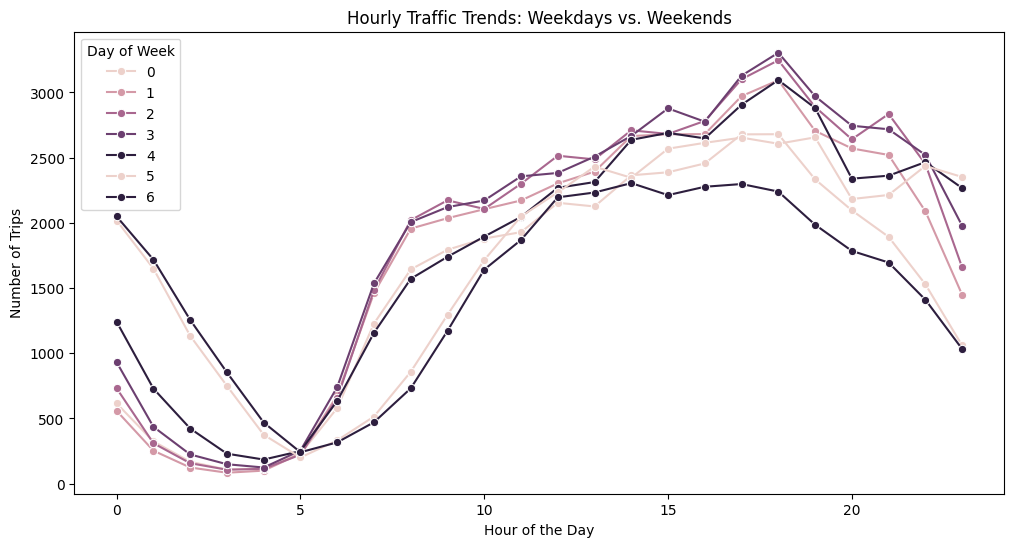

In [106]:
# Compare traffic trends for the week days and weekends
# Group data by day of the week and hour, then count trips
weekday_traffic = df1[df1['day_of_week'] < 5].groupby(['day_of_week', 'pickup_hour'])['pickup_hour'].count().reset_index(name='trip_count')
weekend_traffic = df1[df1['day_of_week'] >= 5].groupby(['day_of_week', 'pickup_hour'])['pickup_hour'].count().reset_index(name='trip_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', hue='day_of_week', data=weekday_traffic, marker='o')
sns.lineplot(x='pickup_hour', y='trip_count', hue='day_of_week', data=weekend_traffic, marker='o')
plt.title('Hourly Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day of Week')
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [107]:
# Find top 10 pickup and dropoff zones

# Top 10 Pickup Zones
top_10_pickup_zones = df1['PULocationID'].value_counts().nlargest(10).index
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)

# Top 10 Dropoff Zones
top_10_dropoff_zones = df1['DOLocationID'].value_counts().nlargest(10).index
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)



Top 10 Pickup Zones:
Index([132, 237, 161, 236, 162, 138, 186, 142, 230, 170], dtype='int64', name='PULocationID')

Top 10 Dropoff Zones:
Index([236, 237, 161, 230, 170, 162, 142, 239, 141, 68], dtype='int64', name='DOLocationID')


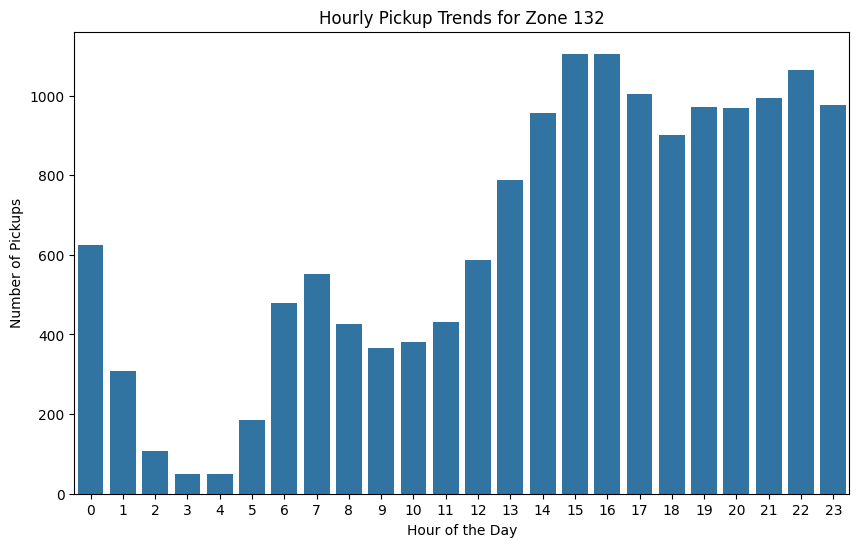

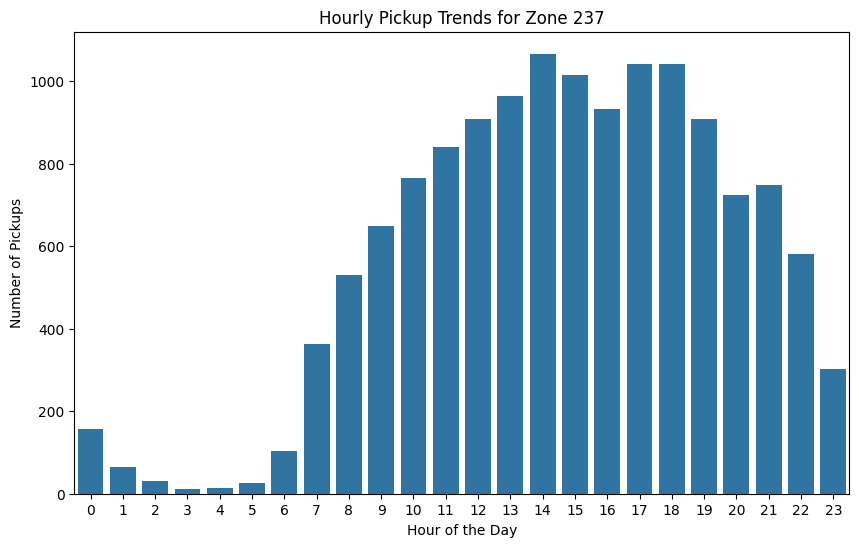

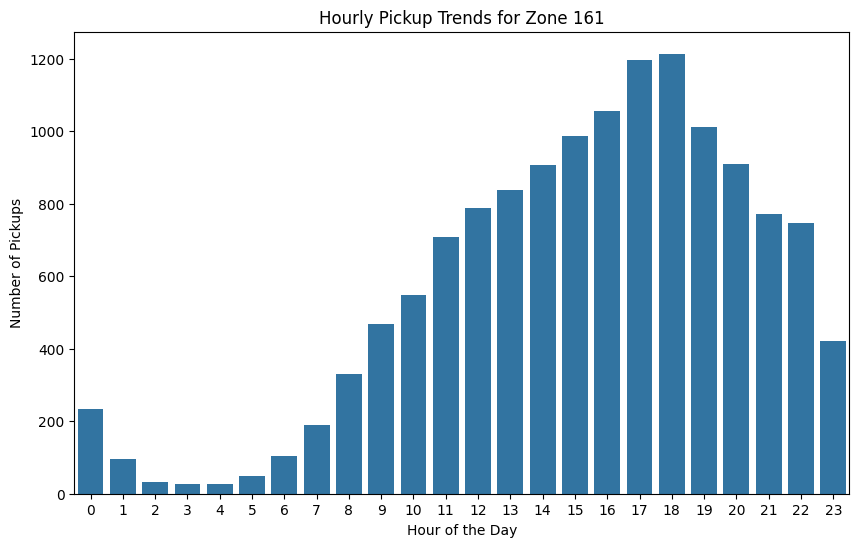

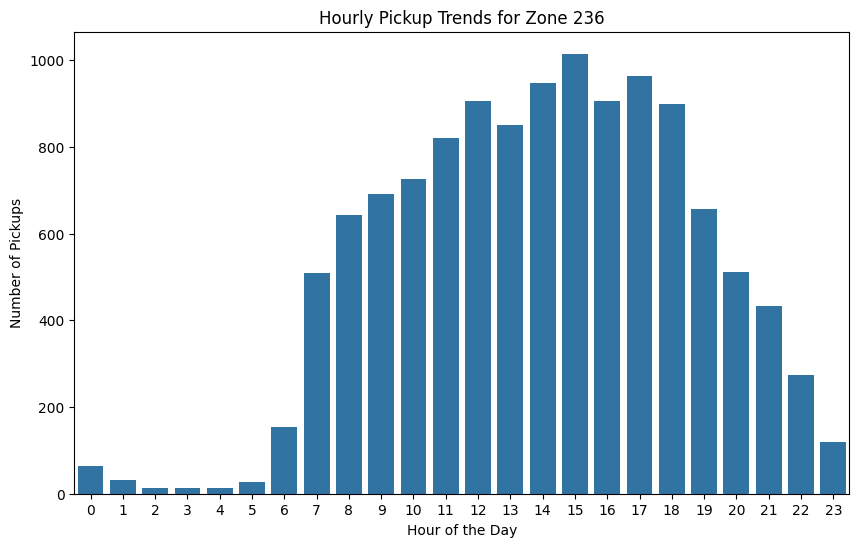

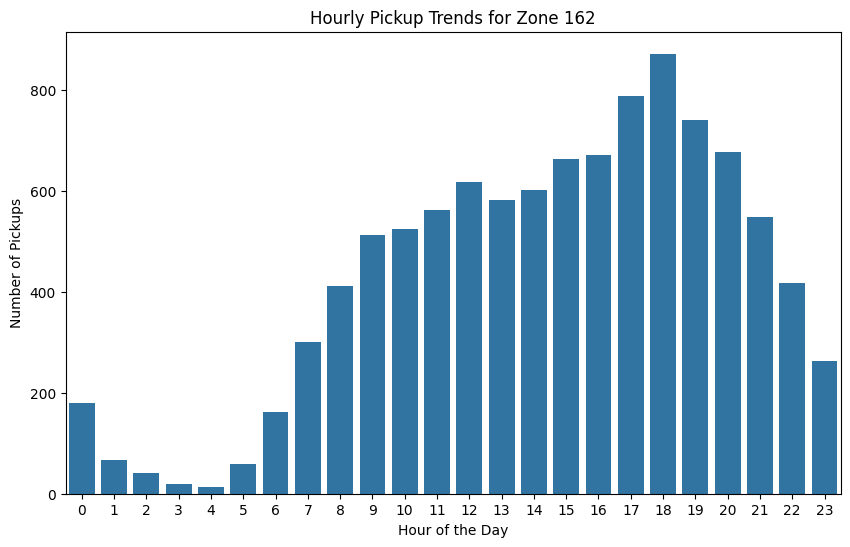

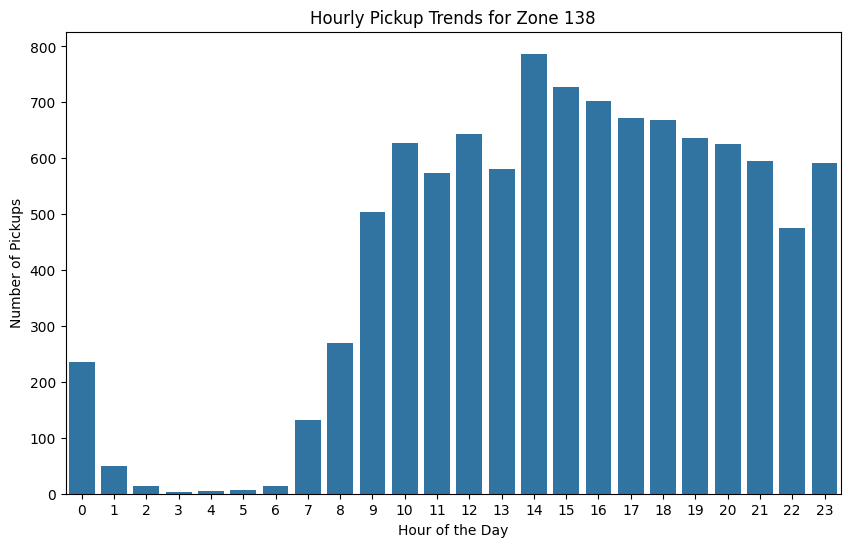

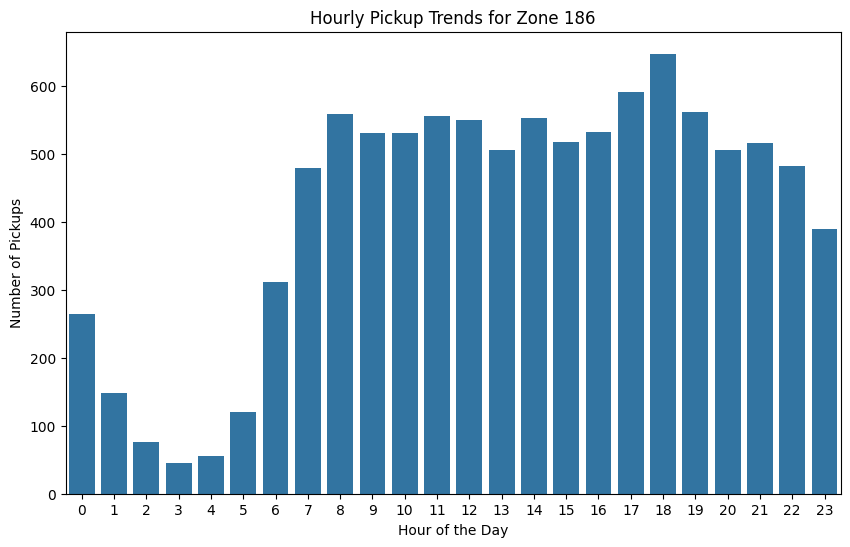

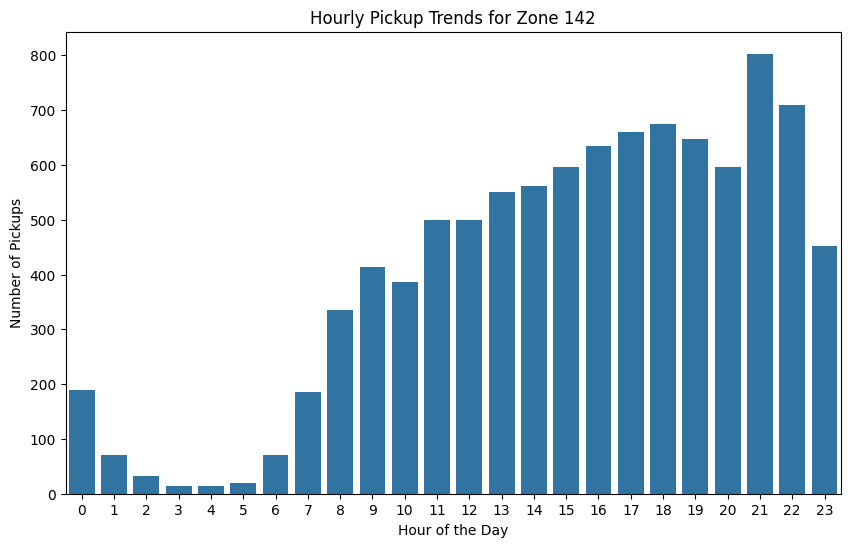

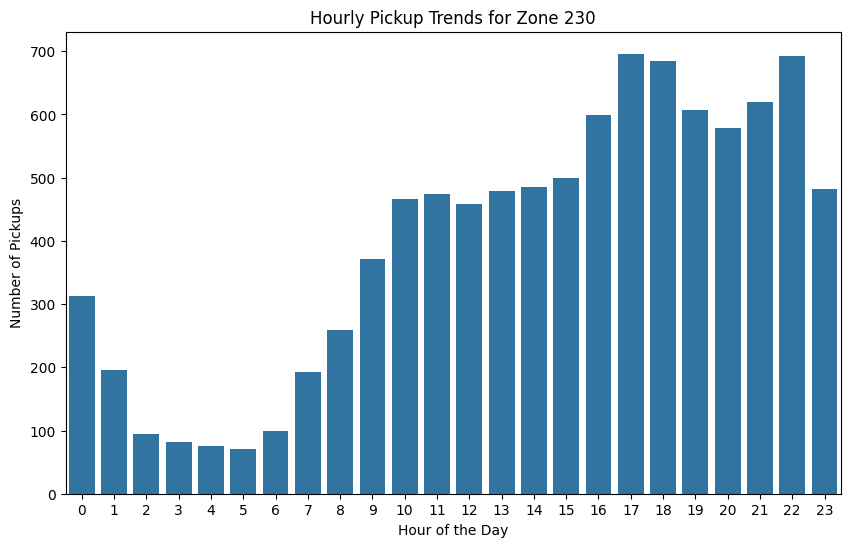

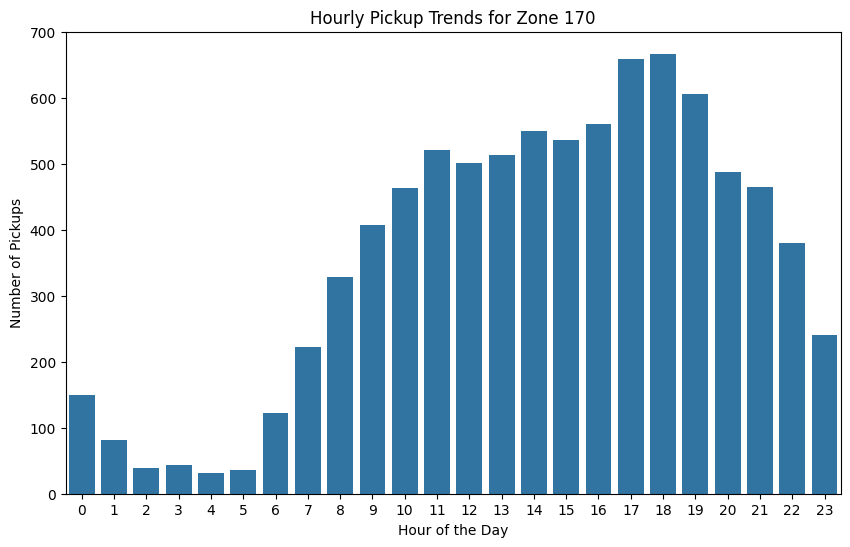

In [108]:
#  Visualize pickup trends for top 10 zones (example for one zone)


for zone in top_10_pickup_zones:
  zone_data = df1[df1['PULocationID'] == zone]
  hourly_pickups = zone_data.groupby('pickup_hour')['pickup_hour'].count()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values)
  plt.title(f'Hourly Pickup Trends for Zone {zone}')
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Pickups')
  plt.show()

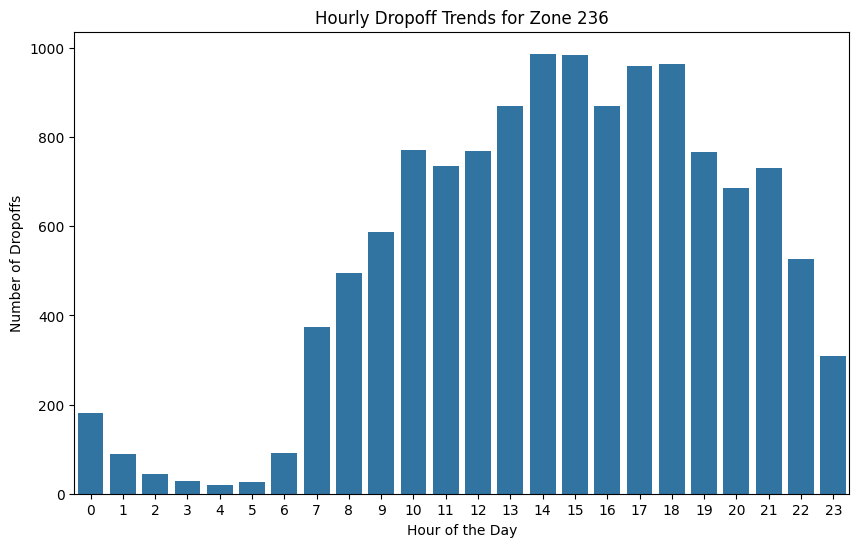

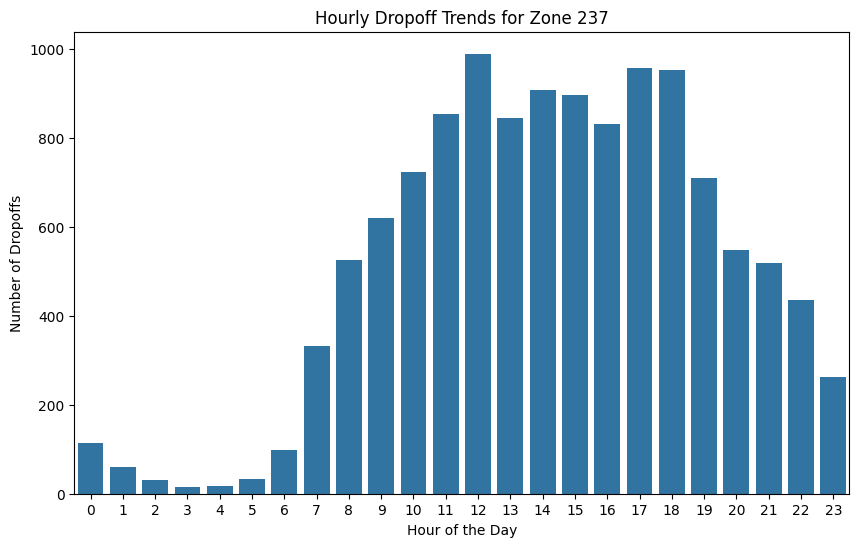

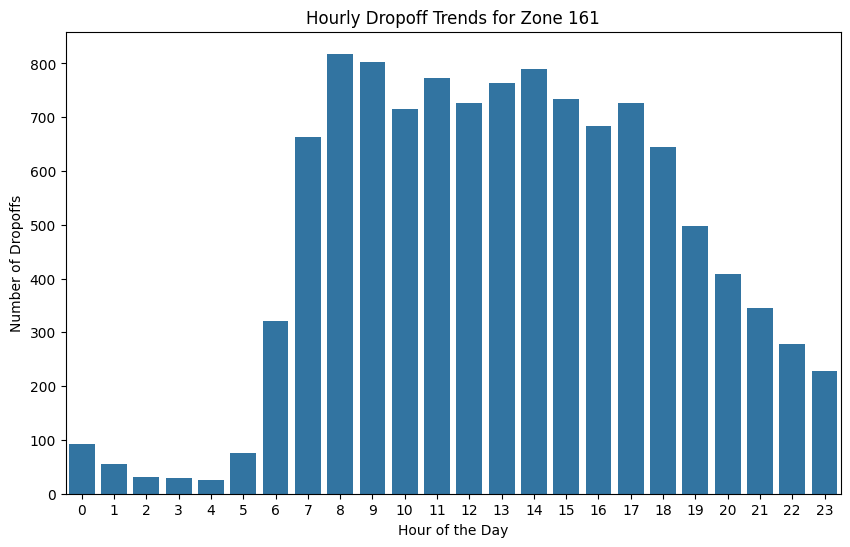

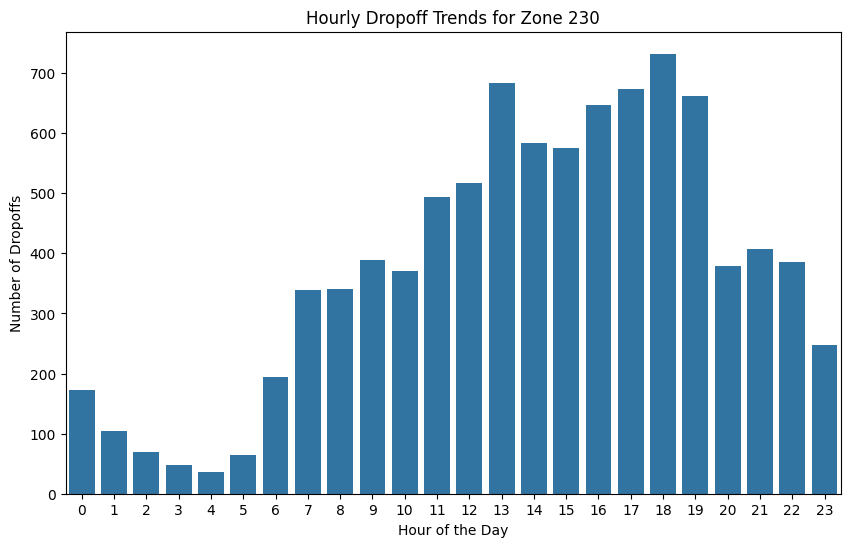

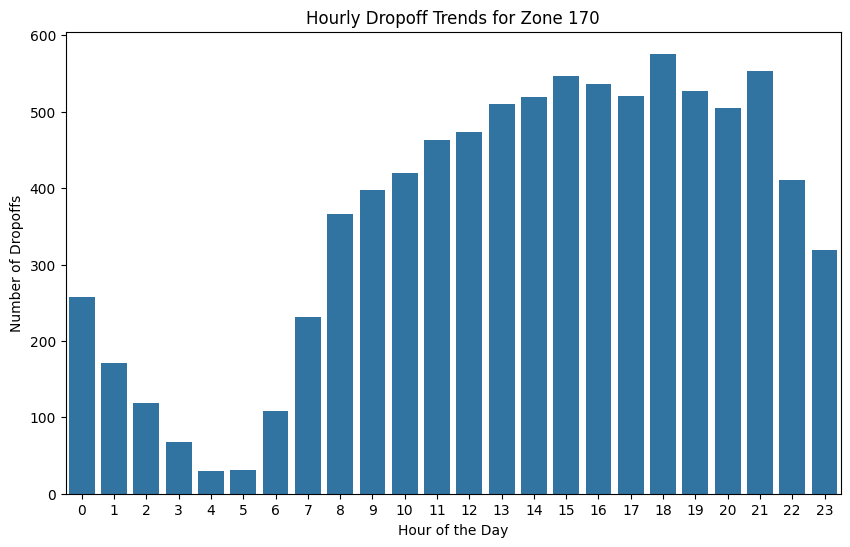

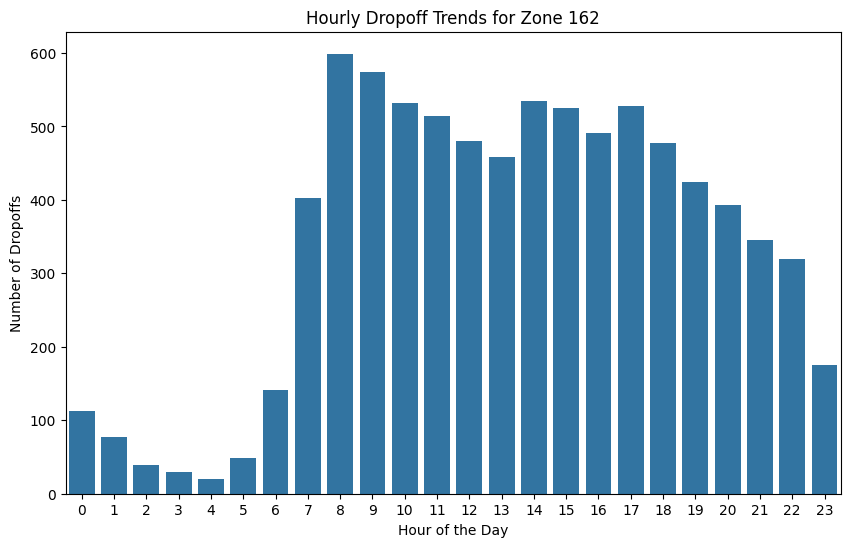

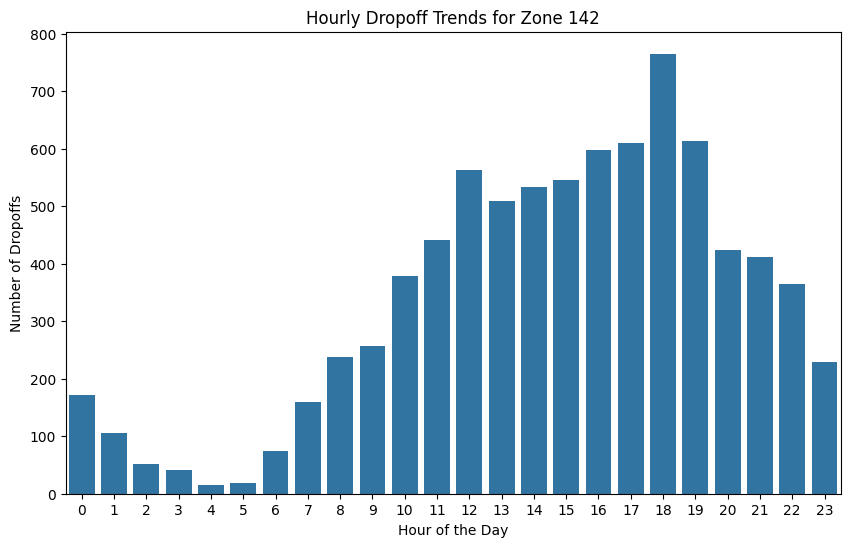

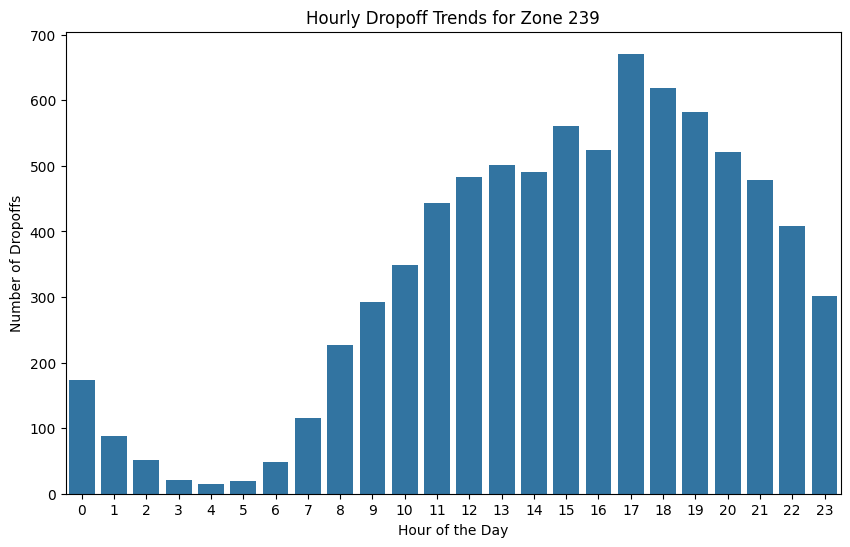

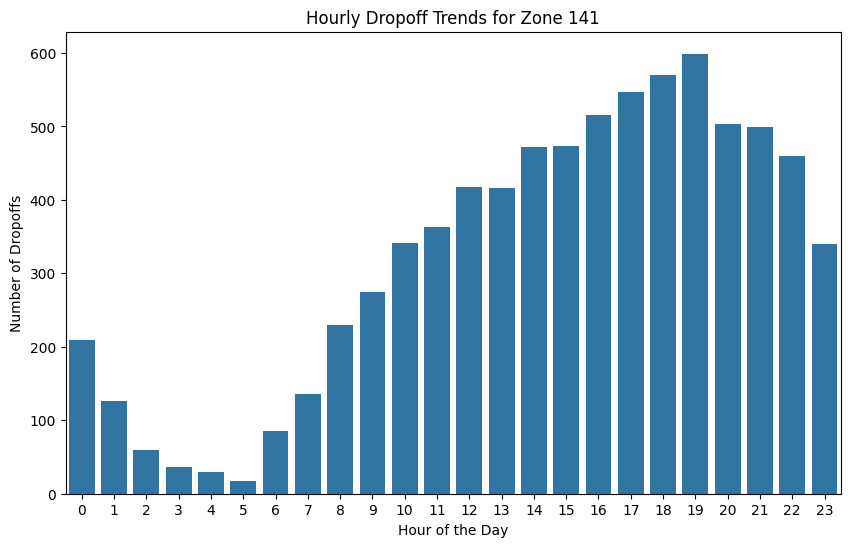

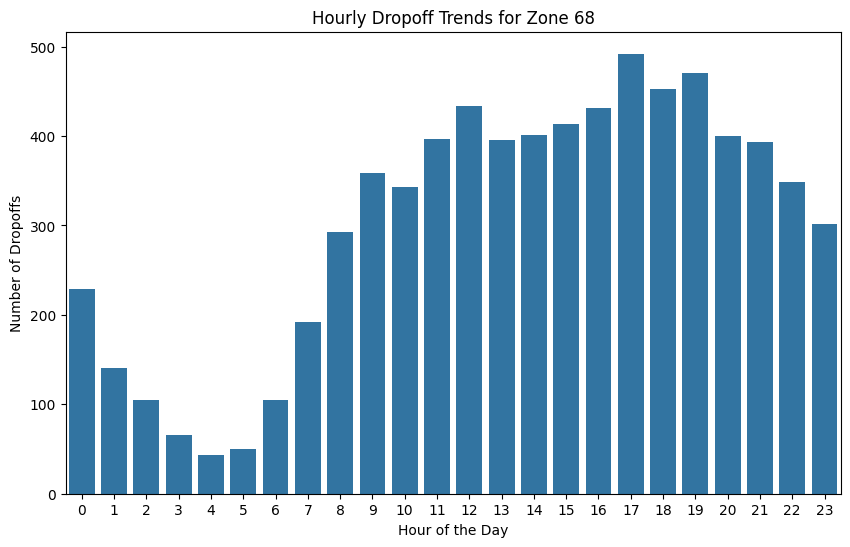

In [109]:
# Visualize dropoff trends for top 10 zones (example for one zone)
for zone in top_10_dropoff_zones:
  zone_data = df1[df1['DOLocationID'] == zone]
  hourly_dropoffs = zone_data.groupby('pickup_hour')['pickup_hour'].count()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=hourly_dropoffs.index, y=hourly_dropoffs.values)
  plt.title(f'Hourly Dropoff Trends for Zone {zone}')
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Dropoffs')
  plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [110]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate the pickup/dropoff ratio for each zone
pickup_counts = df1.groupby('PULocationID')['PULocationID'].count()
dropoff_counts = df1.groupby('DOLocationID')['DOLocationID'].count()

ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count']

# Find the top 10 and bottom 10 ratios
top_10_ratios = ratio_df.sort_values(by='ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values(by='ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count     ratio
70         1293.0            168  7.696429
132       15378.0           3341  4.602814
138       10137.0           3517  2.882286
186       10022.0           6293  1.592563
43         4899.0           3539  1.384289
114        3810.0           2841  1.341077
249        6406.0           4837  1.324375
162       10287.0           8241  1.248271
100        4842.0           3982  1.215972
161       13657.0          11235  1.215576

Bottom 10 Pickup/Dropoff Ratios:


,pickup_count,dropoff_count,ratio
37,8.0,312,0.025641
15,1.0,38,0.026316
257,3.0,105,0.028571
1,31.0,847,0.036600
128,1.0,24,0.041667
106,4.0,87,0.045977
112,32.0,642,0.049844
198,8.0,150,0.053333
36,10.0,181,0.055249
16,3.0,54,0.055556


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [111]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_df = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]

# Top 10 Pickup Zones during night hours
top_10_night_pickup_zones = night_hours_df['PULocationID'].value_counts().nlargest(10)
print("Top 10 Pickup Zones (Night Hours):")
print(top_10_night_pickup_zones)

# Top 10 Dropoff Zones during night hours
top_10_night_dropoff_zones = night_hours_df['DOLocationID'].value_counts().nlargest(10)
print("\nTop 10 Dropoff Zones (Night Hours):")
top_10_night_dropoff_zones

Top 10 Pickup Zones (Night Hours):
PULocationID
79     2456
132    2303
249    1943
48     1615
148    1543
114    1402
230    1312
186    1097
68      971
164     942
Name: count, dtype: int64

Top 10 Dropoff Zones (Night Hours):


,count
DOLocationID,
79,1315
48,1056
170,995
68,936
107,887
249,836
141,818
263,771
230,740


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [112]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]

# Calculate the total revenue for night hours
night_revenue = night_hours_df['total_amount'].sum()

# Calculate the total revenue for all hours
total_revenue = df1['total_amount'].sum()

# Calculate the revenue share for night hours
night_revenue_share = (night_revenue / total_revenue) * 100

# Calculate the revenue share for daytime hours
day_revenue_share = 100 - night_revenue_share

print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")


Nighttime Revenue Share: 12.05%
Daytime Revenue Share: 87.95%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [129]:
# Analyse the fare per mile per passenger for different passenger counts
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Replace infinite values with NaN
df1['fare_per_mile'] = df1['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Group by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger = df1.groupby('passenger_count')['fare_per_mile'].mean() / df1.groupby('passenger_count')['passenger_count'].mean()

# Print the results
print(fare_per_mile_per_passenger)



passenger_count
1.0    10.735403
2.0     6.101860
3.0     3.921918
4.0     3.775161
5.0     1.924415
6.0     1.352768
dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [130]:
# Compare the average fare per mile for different days and for different times of the day
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract day of the week and hour of the day
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df1['hour_of_day'] = df1['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Remove infinity values
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group data and calculate average fare per mile
average_fare_per_mile = df1.groupby(['day_of_week', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Display results
average_fare_per_mile

,day_of_week,hour_of_day,fare_per_mile
0,0,0,6.147813
1,0,1,7.473686
2,0,2,5.955403
3,0,3,42.409006
4,0,4,19.821233
...,...,...,...
163,6,19,14.151931
164,6,20,15.034408
165,6,21,9.272768
166,6,22,25.048558


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [131]:
# Compare fare per mile for different vendors
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Replace infinite values with NaN
df1['fare_per_mile'] = df1['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Group by vendor and hour of the day, then calculate the average fare per mile
average_fare_per_mile_by_vendor_hour = df1.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Display the results
average_fare_per_mile_by_vendor_hour


,VendorID,hour_of_day,fare_per_mile
0,1,0,6.542157
1,1,1,6.830150
2,1,2,6.662702
3,1,3,6.533140
4,1,4,6.634370
5,1,5,7.768214
6,1,6,6.579296
7,1,7,7.083904
8,1,8,8.099182
9,1,9,8.476221


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [132]:
# Defining distance tiers

distance_tiers = pd.cut(df1['trip_distance'], bins=[0, 2, 5, np.inf], labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Group by vendor and distance tier, then calculate the average fare per mile
fare_by_vendor_distance = df1.groupby(['VendorID', distance_tiers])['fare_per_mile'].mean().reset_index()

# Display the results
fare_by_vendor_distance


,VendorID,trip_distance,fare_per_mile
0,1,0-2 miles,9.881869
1,1,2-5 miles,6.359857
2,1,5+ miles,4.426107
3,2,0-2 miles,17.352222
4,2,2-5 miles,6.543536
5,2,5+ miles,4.497065


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

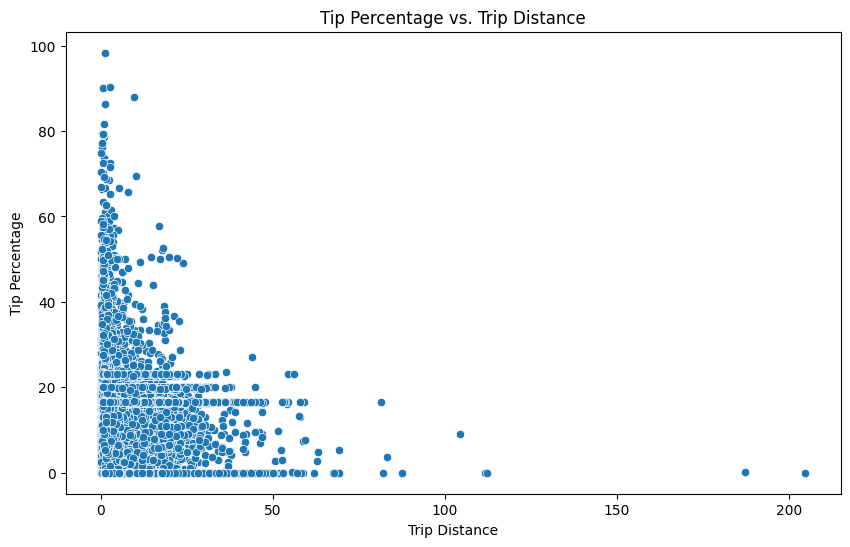

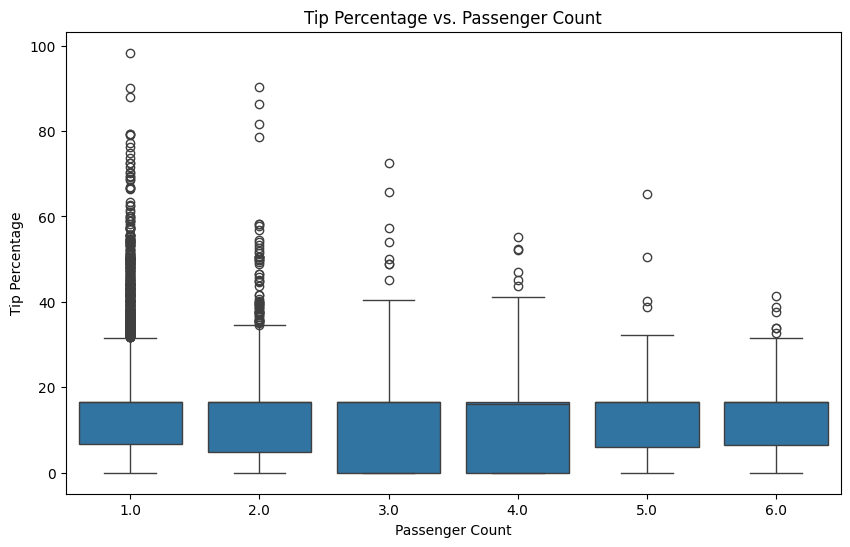

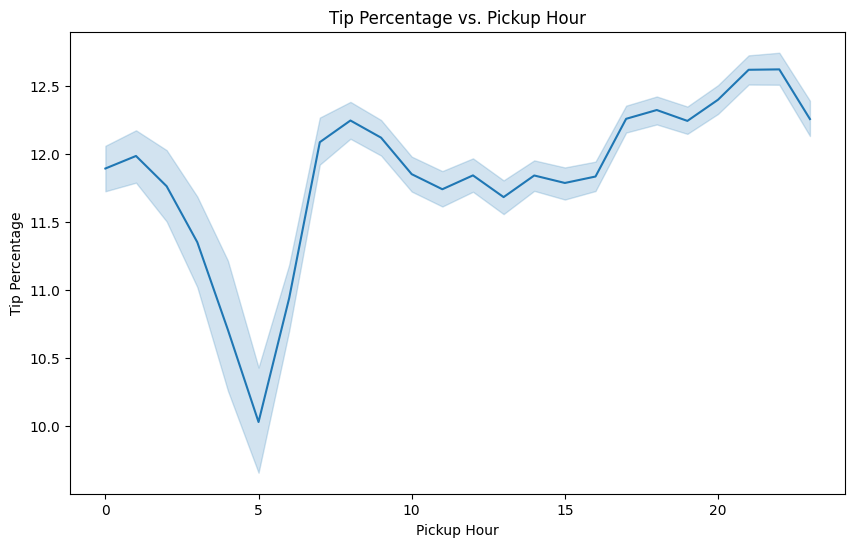

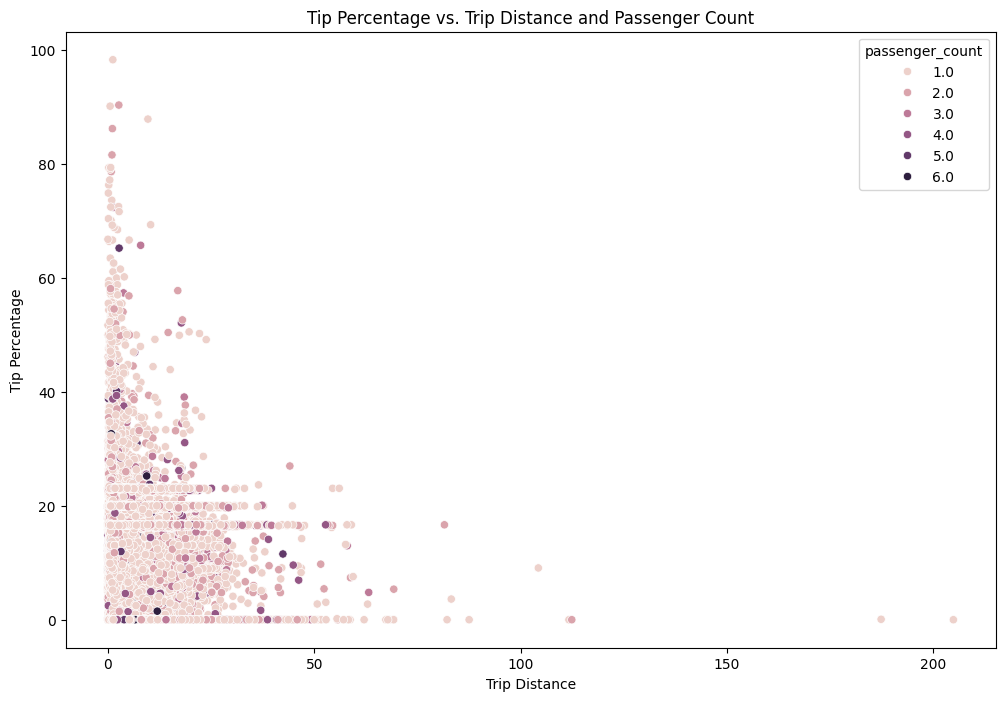

In [133]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df1['tip_percentage'] = (df1['tip_amount'] / df1['total_amount']) * 100

# Analyze tip percentage based on trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on pickup time (hour of the day)
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.show()

# Further analysis (example: combined effect of distance and passenger count)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='tip_percentage', hue='passenger_count', data=df1)
plt.title('Tip Percentage vs. Trip Distance and Passenger Count')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Average tip percentage for trips with tip percentage < 10%: 2.46%
Average tip percentage for trips with tip percentage > 25%: 34.16%

Average trip distance for low tip trips: 3.69
Average trip distance for high tip trips: 2.36

Average tip percentage by hour of day:
pickup_hour
0     11.891063
1     11.983113
2     11.760896
3     11.350176
4     10.706583
5     10.029978
6     10.939202
7     12.084321
8     12.243404
9     12.117442
10    11.849495
11    11.738805
12    11.840559
13    11.681129
14    11.839817
15    11.784903
16    11.832157
17    12.255864
18    12.320374
19    12.240527
20    12.396009
21    12.615849
22    12.618768
23    12.254167
Name: tip_percentage, dtype: float64


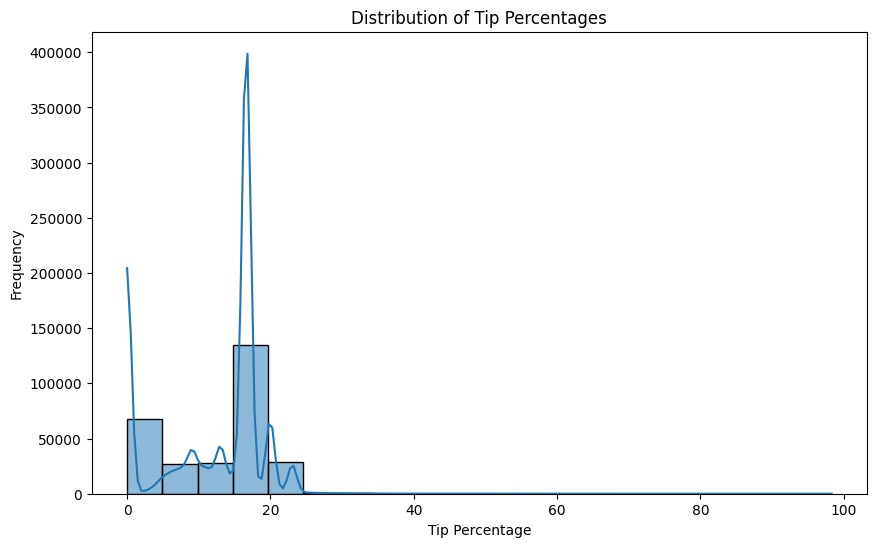

In [134]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# Calculate the average tip percentage for trips with tip percentage < 10%
low_tip_avg = df1[df1['tip_percentage'] < 10]['tip_percentage'].mean()

# Calculate the average tip percentage for trips with tip percentage > 25%
high_tip_avg = df1[df1['tip_percentage'] > 25]['tip_percentage'].mean()

print(f"Average tip percentage for trips with tip percentage < 10%: {low_tip_avg:.2f}%")
print(f"Average tip percentage for trips with tip percentage > 25%: {high_tip_avg:.2f}%")

# Further analysis: Compare other features for these two groups
low_tip_trips = df1[df1['tip_percentage'] < 10]
high_tip_trips = df1[df1['tip_percentage'] > 25]

# Example: Compare average trip distance
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"\nAverage trip distance for low tip trips: {avg_distance_low_tip:.2f}")
print(f"Average trip distance for high tip trips: {avg_distance_high_tip:.2f}")

# Example using groupby: compare average tip percentage by hour of the day
hourly_tip_comparison = df1.groupby('pickup_hour')['tip_percentage'].mean()
print("\nAverage tip percentage by hour of day:")
print(hourly_tip_comparison)

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df1['tip_percentage'], bins=20, kde=True)
plt.title('Distribution of Tip Percentages')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# prompt: See how passenger count varies across hours and days

# Analyze the variation of passenger count across hours and days of the week.
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Passenger Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()

# Further analysis: Combined effect of day and hour
plt.figure(figsize=(15, 8))
sns.pointplot(x='pickup_hour', y='passenger_count', hue='day_of_week', data=df1)
plt.title('Passenger Count Variation by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()


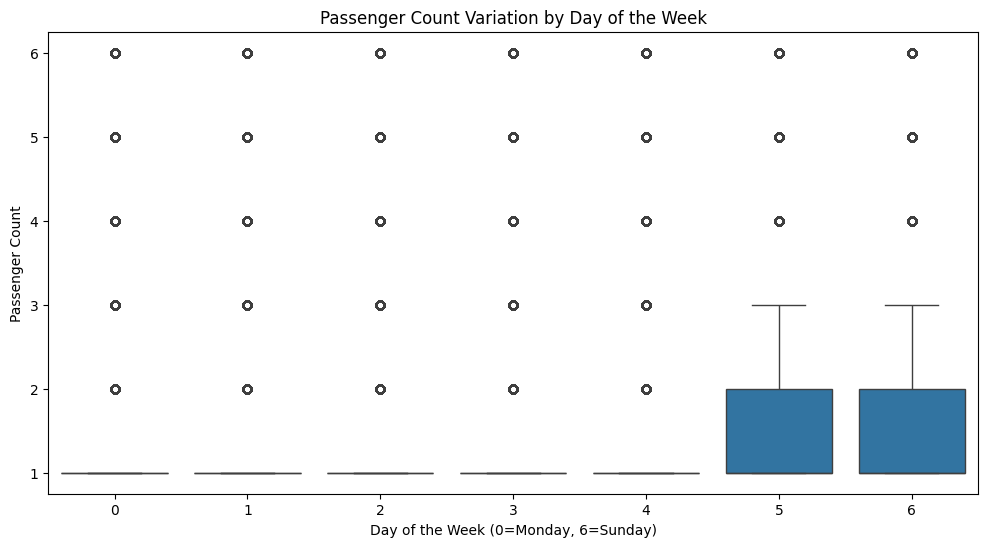

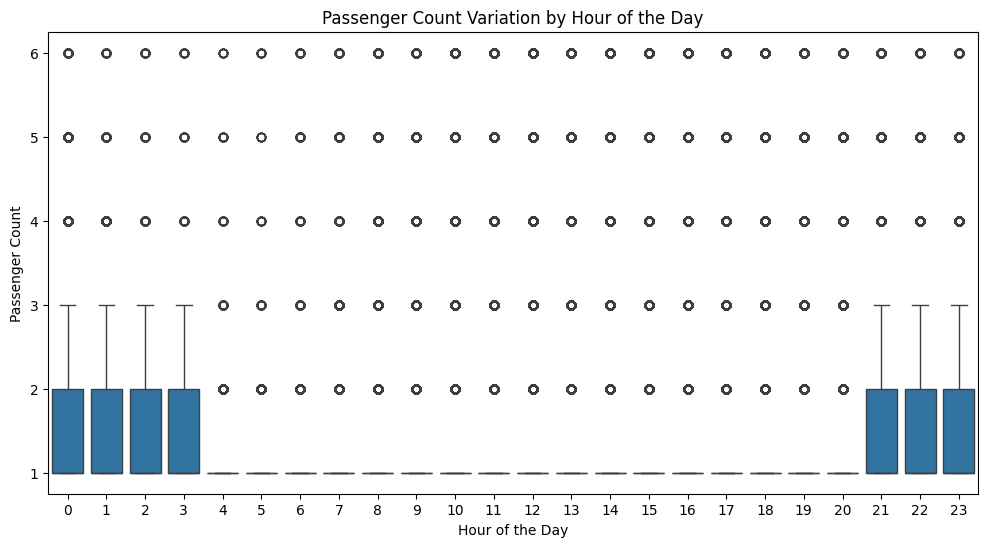

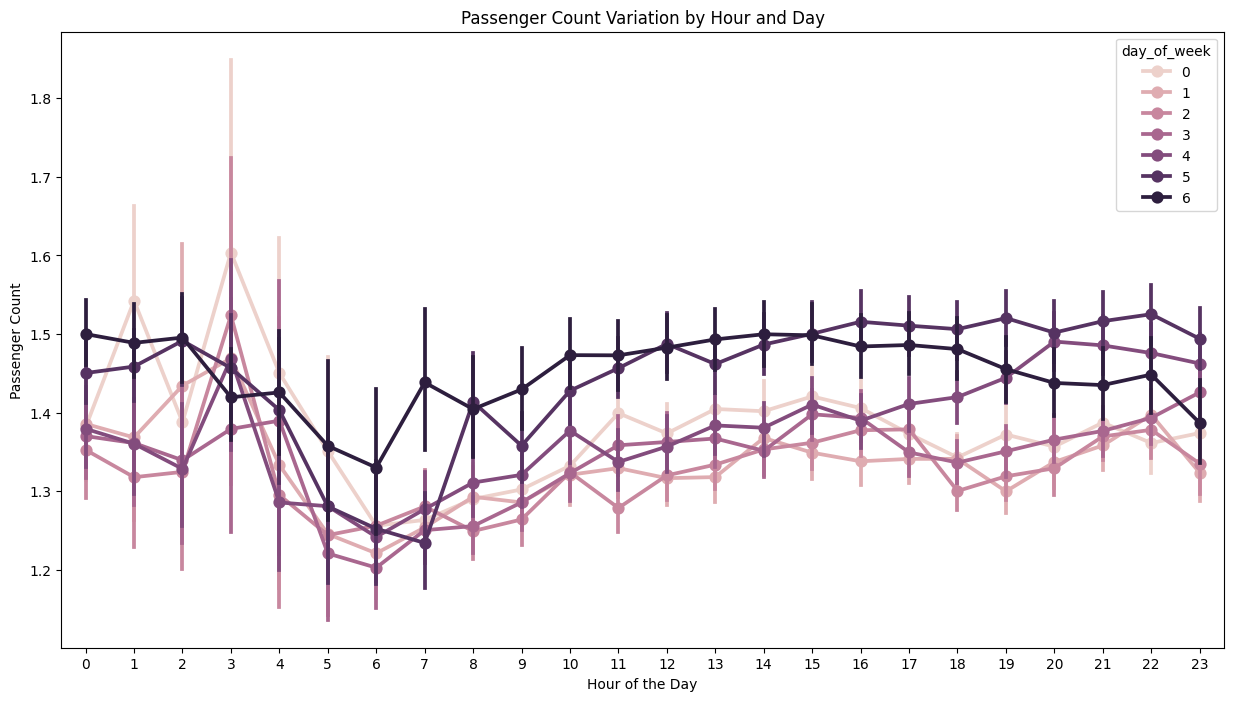

In [135]:
# See how passenger count varies across hours and days
# Analyze the variation of passenger count across hours and days of the week.
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Passenger Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()

# Further analysis: Combined effect of day and hour
plt.figure(figsize=(15, 8))
sns.pointplot(x='pickup_hour', y='passenger_count', hue='day_of_week', data=df1)
plt.title('Passenger Count Variation by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

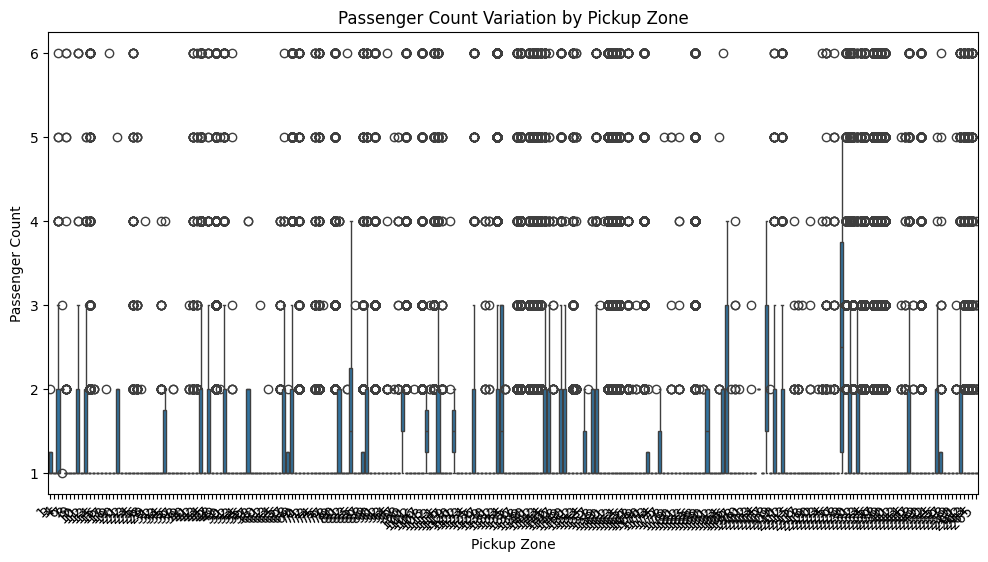

In [136]:
# How does passenger count vary across zones
plt.figure(figsize=(12, 6))
sns.boxplot(x='PULocationID', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()



In [138]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count_by_zone = df1.groupby('PULocationID')['passenger_count'].mean()

# Merge the average passenger count into the 'zones' GeoDataFrame.
zones_with_trips = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_index=True, how='left')

# Rename the new column for clarity
zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Display the updated GeoDataFrame with the new column
print(zones_with_trips.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   

   trip_count  avg_passenger_count  
0          31             1.250000  
2           9             1.000000  
3    

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [139]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge'] # Example surcharge columns

for surcharge in surcharge_columns:
  if surcharge in df1.columns:
    # Count occurrences of each surcharge
    surcharge_counts = df1[surcharge].value_counts()
    print(f"Frequency of {surcharge}:")
    print(surcharge_counts)

    # Analyze zones and times when surcharges are applied
    if surcharge_counts.index.isin([0,1]).all(): # Check if surcharge column has only 0 or 1
      surcharge_applied = df1[df1[surcharge] == 1]

      # Pickup zone analysis
      pickup_zone_surcharges = surcharge_applied.groupby('PULocationID')[surcharge].count()
      print(f"\nTop pickup zones with {surcharge} applied:")
      print(pickup_zone_surcharges.nlargest(10))

      # Dropoff zone analysis
      dropoff_zone_surcharges = surcharge_applied.groupby('DOLocationID')[surcharge].count()
      print(f"\nTop dropoff zones with {surcharge} applied:")
      print(dropoff_zone_surcharges.nlargest(10))

      # Time analysis
      hourly_surcharges = surcharge_applied.groupby('pickup_hour')[surcharge].count()
      print(f"\nHourly frequency of {surcharge} applied:")
      print(hourly_surcharges)

      # Visualize hourly surcharges
      plt.figure(figsize=(10, 6))
      sns.barplot(x=hourly_surcharges.index, y=hourly_surcharges.values)
      plt.title(f'Hourly Frequency of {surcharge} Applied')
      plt.xlabel('Hour of Day')
      plt.ylabel('Number of Surcharges')
      plt.show()
    else:
      print(f"Column '{surcharge}' does not appear to represent a binary surcharge (0 or 1)")
  else:
    print(f"Warning: Column '{surcharge}' not found in the DataFrame.")


Frequency of extra:
extra
0.00     108436
2.50      72850
1.00      56783
5.00      21046
3.50      16739
7.50       2561
6.00       2365
4.25       1013
9.25       1006
1.75        497
3.75        422
6.75        385
2.75        348
8.75        310
10.25       276
7.75        215
1.25        206
11.75       204
6.25        127
2.25        127
10.00       100
9.75         85
7.25         63
11.25        60
8.50         51
3.20          7
3.00          6
5.25          5
0.50          4
3.25          3
0.75          1
0.03          1
4.75          1
2.45          1
1.50          1
0.70          1
Name: count, dtype: int64
Column 'extra' does not appear to represent a binary surcharge (0 or 1)
Frequency of improvement_surcharge:
improvement_surcharge
1.0    286146
0.3       138
0.0        22
Name: count, dtype: int64
Column 'improvement_surcharge' does not appear to represent a binary surcharge (0 or 1)
Frequency of congestion_surcharge:
congestion_surcharge
2.5    266087
0.0     20219
Na

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:

# Recommendations to optimize routing and dispatching

# 1. Dynamic Pricing: Implement surge pricing during peak hours and in high-demand zones.
#    - Identify peak hours and high-demand zones using the hourly pickup/dropoff trends and top zones analysis.
#    - Adjust prices based on the ratio of pickups/dropoffs to optimize supply and demand.
#    - Consider time-of-day and day-of-week variations in demand when adjusting prices.

# 2. Optimized Vehicle Dispatching:
#    - Allocate more vehicles to high-demand zones during peak hours.
#    - Use real-time data to predict demand and proactively adjust vehicle distribution.
#    - Prioritize dispatching to areas with high pickup/dropoff ratios.
#    - Consider using predictive models to forecast demand and optimize vehicle allocation in advance.

# 3. Route Optimization:
#    - Use algorithms to determine the most efficient routes for drivers based on current traffic, demand, and pickup/dropoff locations.
#    - Consider incorporating real-time traffic information into routing algorithms.
#    - Factor in the average trip distance and fare rates for different vendors and distance tiers when calculating optimal routes.

# 4. Nighttime Operations:
#    - Increase the number of vehicles operating during night hours (11PM-5AM) in zones with high night time demand.
#    - Consider offering different pricing strategies for night trips based on revenue shares.

# 5. Consider passenger counts:
#    - Adjust pricing based on the average fare per mile per passenger for different passenger counts.

# 6. Improve Customer Experience:
#    - Analyze customer tipping behaviors and identify factors that influence tip percentages.
#    - Investigate low tip areas (distance, passenger count, time of day) to understand and improve these aspects.
#    - Consider rewarding drivers with high tip percentages or good customer service ratings.


# 7. Address Surcharges:
#    - Analyze the frequency and locations of extra charges to understand their prevalence.
#    - Investigate zones and times with high surcharge applications to understand root causes and explore potential solutions.

# Example:
# During weekdays (Monday-Friday) between 5 pm and 8 pm, increase the number of available vehicles in zones 7, 231, 4, and 263.
# Apply a 20% surcharge during peak hours in these zones.
# During the early morning and late-night hours, reduce the vehicle supply in areas of low demand and reposition to high demand zones


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:

# Position more cabs in high-demand zones during peak hours, as identified by analyzing pickup/dropoff ratios across different times, days, and months.  This ensures sufficient supply to meet increased demand.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Data-Driven Pricing Adjustments

# 1. Time-Based Adjustments:
#    - Implement dynamic pricing based on hourly and daily demand fluctuations.
#    - Offer lower fares during off-peak hours and days to attract price-sensitive customers and fill empty vehicles.
#    - Consider a tiered pricing strategy for different time blocks (e.g., rush hour, daytime, nighttime).  Refer to 3.2.8 for revenue shares.

# 2. Location-Based Adjustments:
#    - Consider the average fare per mile in different zones (identified in 3.2.15) to establish competitive pricing.
#    - Implement zone-specific surge pricing during peak hours or special events.

# 3. Distance-Based Adjustments:
#    - Consider a minimum fare for short trips and gradually increase the price per mile for longer journeys.

# 4. Passenger Count Adjustments:
#    - Adjust pricing based on the average fare per mile per passenger for different passenger counts (3.2.9).
#    - This will ensure fair pricing for shared rides and incentivize riders to opt for shared trips where possible.

# 5. Vendor Competitiveness:
#    - Adjust prices to undercut competitors in specific zones or times when possible while still maintaining profitability.

# 6. Surcharge Optimization:
#    - Evaluate the impact of existing surcharges on revenue and customer satisfaction.
#    - Re-evaluate or refine surcharge strategies based on this analysis.

# 7. Customer Behavior (Tipping):
#   - While not directly impacting pricing, understanding the factors influencing tips (trip distance, passenger count, time of pickup) can indirectly impact pricing.
#   - For example, offering slightly lower fares to incentivize higher tips could be considered, or offering higher base fares for long trips.


# Implementation:
# - A/B testing: Implement changes gradually and test their impact on revenue, customer behavior, and market share.
# - Data Monitoring: Continuously monitor key metrics (revenue, ride volume, customer satisfaction) to measure the success of pricing adjustments.
# - Machine Learning: Utilize machine learning techniques to predict demand and dynamically adjust pricing in real-time.
